In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [101]:
df_race = pd.read_csv('data/1ironmanaustria2024.csv')

In [102]:
df_race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2853 entries, 0 to 2852
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Bib                          2853 non-null   int64  
 1   Name                         2853 non-null   object 
 2   Country                      2853 non-null   object 
 3   gender                       2853 non-null   object 
 4   Division                     2853 non-null   object 
 5   Overall Time                 2853 non-null   object 
 6   Overall Rank                 2645 non-null   float64
 7   Gender Rank                  2645 non-null   float64
 8   Age Group Rank               2645 non-null   float64
 9   Swim Time                    2853 non-null   object 
 10  Swim Rank                    2787 non-null   float64
 11  Gender Swim Rank             2787 non-null   float64
 12  Age Group Swim Rank          2787 non-null   float64
 13  Bike Time         

In [103]:
df_race.drop(['Bib', 
'Country',
'Gender Rank',
'Swim Time',
'Swim Rank',
'Gender Swim Rank',
'Age Group Swim Rank',
'Bike Time',
'Bike Rank',
'Gender Bike Rank',
'Age Group Bike Rank',
'Run Time', 
'Gender Run Rank',
'Age Group Run Rank',
'Run Rank',
'Transition 1 Time',
'Transition 1 Rank',
'Gender Transition 1 Rank',
'Age Group Transition 1 Rank',
'Transition 2 Time',
'Transition 2 Rank',
'Gender Transition 2 Rank',
'Age Group Transition 2 Rank',
'Qualifier Time'], axis=1, inplace=True )



In [104]:
df_race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2853 entries, 0 to 2852
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            2853 non-null   object 
 1   gender          2853 non-null   object 
 2   Division        2853 non-null   object 
 3   Overall Time    2853 non-null   object 
 4   Overall Rank    2645 non-null   float64
 5   Age Group Rank  2645 non-null   float64
 6   Finish          2853 non-null   object 
 7   Qualifier Rank  2618 non-null   float64
 8   Qualified       98 non-null     float64
dtypes: float64(4), object(5)
memory usage: 200.7+ KB


In [105]:
qualified_count = df_race['Qualified'].eq(1).sum()

df_OldKQ = df_race[df_race['Qualified'] == 1].groupby('Division')

old_KQ_agegroup = df_race[df_race['Qualified'] == 1].groupby('Division').size()

print(old_KQ_agegroup)

Division
F18-24     2
F25-29     7
F30-34    10
F35-39     6
F40-44     5
F45-49     8
F50-54     5
F55-59     3
F60-64     2
F65-69     1
M18-24     2
M25-29     5
M30-34     8
M35-39     6
M40-44     6
M45-49     6
M50-54     7
M55-59     4
M60-64     2
M65-69     1
M70-74     1
M75-79     1
dtype: int64


In [106]:
data = {
    'Age Group': [
        'M18-24', 'M25-29', 'M30-34', 'M35-39', 'M40-44', 'M45-49',
        'M50-54', 'M55-59', 'M60-64', 'M65-69', 'M70-74', 'M75-79',
        'M80-84', 'M85-89',
        'F18-24', 'F25-29', 'F30-34', 'F35-39', 'F40-44', 'F45-49',
        'F50-54', 'F55-59', 'F60-64', 'F65-69', 'F70-74', 'F75-79',
        'F80-84', 'F85-89'
    ],
    'Multiplier': [
        0.9698, 0.9921, 1.0, 0.9895, 0.9683, 0.9401,
        0.9002, 0.8667, 0.8262, 0.7552, 0.6876, 0.6768,
        0.5555, 0.5416,
        0.8567, 0.8961, 0.8977, 0.8866, 0.8707, 0.8501,
        0.8125, 0.7778, 0.7218, 0.6828, 0.6439, 0.5521,
        None, None  # for F80-84 and F85-89 if data is missing
    ]
}

df_Multiplier = pd.DataFrame(data)
print(df_Multiplier)

   Age Group  Multiplier
0     M18-24      0.9698
1     M25-29      0.9921
2     M30-34      1.0000
3     M35-39      0.9895
4     M40-44      0.9683
5     M45-49      0.9401
6     M50-54      0.9002
7     M55-59      0.8667
8     M60-64      0.8262
9     M65-69      0.7552
10    M70-74      0.6876
11    M75-79      0.6768
12    M80-84      0.5555
13    M85-89      0.5416
14    F18-24      0.8567
15    F25-29      0.8961
16    F30-34      0.8977
17    F35-39      0.8866
18    F40-44      0.8707
19    F45-49      0.8501
20    F50-54      0.8125
21    F55-59      0.7778
22    F60-64      0.7218
23    F65-69      0.6828
24    F70-74      0.6439
25    F75-79      0.5521
26    F80-84         NaN
27    F85-89         NaN


In [107]:
df_race = df_race.merge(df_Multiplier, left_on='Division', right_on='Age Group', how='left')
df_race['Time_seconds'] = pd.to_timedelta(df_race['Overall Time']).dt.total_seconds()
df_race['GradedTimeseconds'] = df_race['Time_seconds'] * df_race['Multiplier']

df_race['GradedTime'] = df_race['GradedTimeseconds'].apply(
    lambda x: str(datetime.timedelta(seconds=x)) if pd.notnull(x) else None
)
df_race = df_race[~df_race['Division'].isin(['MPRO', 'FPRO'])]
df_race.head()

,Name,gender,Division,Overall Time,Overall Rank,Age Group Rank,Finish,Qualifier Rank,Qualified,Age Group,Multiplier,Time_seconds,GradedTimeseconds,GradedTime
0,Marit Lindemann,Female,F30-34,09:12:31,61.0,1.0,FIN,1.0,1.0,F30-34,0.8977,33151.0,29759.6527,8:15:59.652700
1,Jan Blokland,Male,M60-64,10:04:48,275.0,1.0,FIN,2.0,1.0,M60-64,0.8262,36288.0,29981.1456,8:19:41.145600
2,Thierry Girard,Male,M65-69,11:05:58,813.0,1.0,FIN,3.0,1.0,M65-69,0.7552,39958.0,30176.2816,8:22:56.281600
3,Pete Eggleston,Male,M55-59,09:43:25,163.0,1.0,FIN,4.0,1.0,M55-59,0.8667,35005.0,30338.8335,8:25:38.833500
4,Kurt Kriechbaum,Male,M55-59,09:44:17,169.0,2.0,FIN,5.0,1.0,M55-59,0.8667,35057.0,30383.9019,8:26:23.901900


In [108]:
newKQ = df_race[df_race['Age Group Rank'] == 1].copy()
winnercount = newKQ['Qualified'].eq(1).sum()

to_remove = ['DNF', 'DQ', 'DNS']
df_race = df_race[~df_race['Finish'].isin(to_remove)]
df_race = df_race[df_race['Age Group Rank'] != 1]
df_race = df_race.sort_values(by='GradedTimeseconds')

df_race.head()

,Name,gender,Division,Overall Time,Overall Rank,Age Group Rank,Finish,Qualifier Rank,Qualified,Age Group,Multiplier,Time_seconds,GradedTimeseconds,GradedTime
4,Kurt Kriechbaum,Male,M55-59,09:44:17,169.0,2.0,FIN,5.0,1.0,M55-59,0.8667,35057.0,30383.9019,8:26:23.901900
6,Eva Berger,Female,F25-29,09:29:04,106.0,2.0,FIN,7.0,1.0,F25-29,0.8961,34144.0,30596.4384,8:29:56.438400
8,Thierry Reghem,Male,M65-69,11:18:50,944.0,2.0,FIN,9.0,NaN,M65-69,0.7552,40730.0,30759.2960,8:32:39.296000
10,Bernd Wester,Male,M55-59,09:51:59,211.0,3.0,FIN,11.0,1.0,M55-59,0.8667,35519.0,30784.3173,8:33:04.317300
12,Matti Punkari,Male,M50-54,09:30:55,111.0,2.0,FIN,13.0,1.0,M50-54,0.9002,34255.0,30836.3510,8:33:56.351000


In [109]:
new_Q_count = qualified_count - winnercount

newKQ = pd.concat([newKQ, df_race.head(new_Q_count)], ignore_index=True)

print(newKQ)

                    Name  gender Division Overall Time  Overall Rank  \
0        Marit Lindemann  Female   F30-34     09:12:31          61.0   
1           Jan Blokland    Male   M60-64     10:04:48         275.0   
2         Thierry Girard    Male   M65-69     11:05:58         813.0   
3         Pete Eggleston    Male   M55-59     09:43:25         163.0   
4   Natasha Harris-White  Female   F25-29     09:28:13         100.0   
..                   ...     ...      ...          ...           ...   
94   Mathias Burgstaller    Male   M45-49     09:38:03         138.0   
95    Sebastian Fröhlich    Male   M35-39     09:09:15          56.0   
96         Heinz Vollmer    Male   M65-69     11:59:40        1393.0   
97         Azat Mulyukov    Male   M60-64     10:58:23         734.0   
98     Filippo Raffaelli    Male   M45-49     09:38:39         141.0   

    Age Group Rank Finish  Qualifier Rank  Qualified Age Group  Multiplier  \
0              1.0    FIN             1.0        1.0    F

In [110]:
new_KQ_agegroup = newKQ.groupby('Division').size()

print(new_KQ_agegroup)

Division
F18-24     1
F25-29     3
F30-34     3
F35-39     2
F40-44     2
F45-49     2
F50-54     1
F55-59     4
F60-64     1
F65-69     1
M18-24     4
M25-29     2
M30-34     8
M35-39    11
M40-44     8
M45-49     9
M50-54    11
M55-59     8
M60-64    10
M65-69     5
M70-74     1
M75-79     1
M80-84     1
dtype: int64


In [111]:
print(old_KQ_agegroup)

Division
F18-24     2
F25-29     7
F30-34    10
F35-39     6
F40-44     5
F45-49     8
F50-54     5
F55-59     3
F60-64     2
F65-69     1
M18-24     2
M25-29     5
M30-34     8
M35-39     6
M40-44     6
M45-49     6
M50-54     7
M55-59     4
M60-64     2
M65-69     1
M70-74     1
M75-79     1
dtype: int64


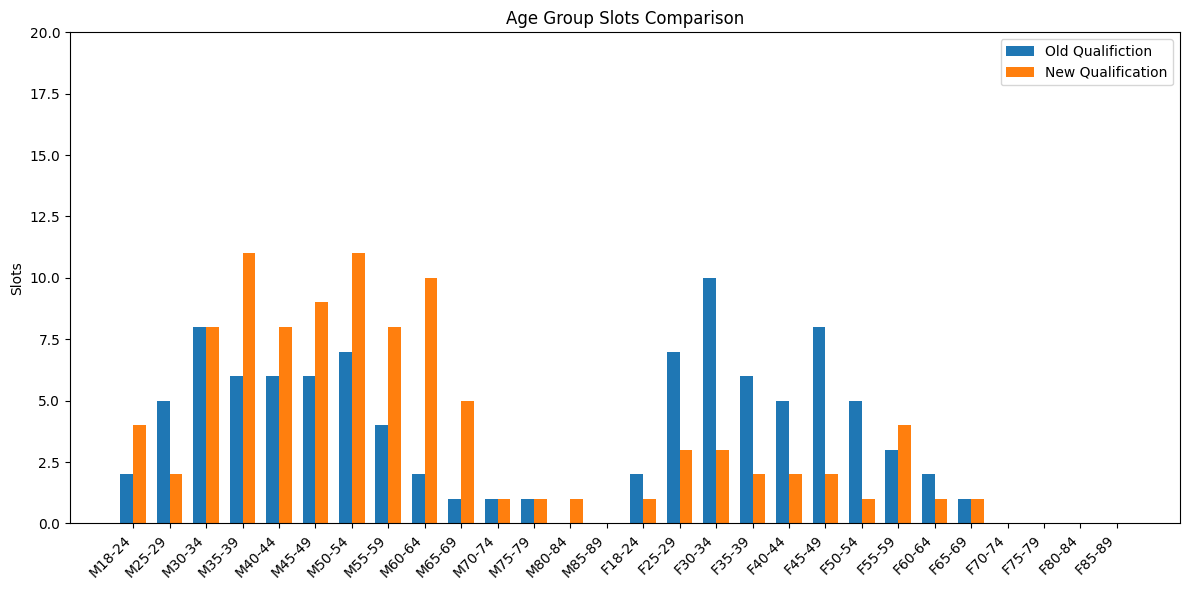

In [112]:
old_KQ_agegroup = old_KQ_agegroup.reindex(data['Age Group'], fill_value=0)
new_KQ_agegroup = new_KQ_agegroup.reindex(data['Age Group'], fill_value=0)
df_compare = pd.DataFrame({
    'Dataset 1': old_KQ_agegroup,
    'Dataset 2': new_KQ_agegroup
})

labels = df_compare.index
x = np.arange(len(labels)) 
width = 0.35 

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, df_compare['Dataset 1'], width, label='Old Qualifiction')
bars2 = ax.bar(x + width/2, df_compare['Dataset 2'], width, label='New Qualification')

ax.set_ylabel('Slots')
ax.set_title('Age Group Slots Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_ylim([0, 20])

ax.legend()

plt.tight_layout()
plt.show()

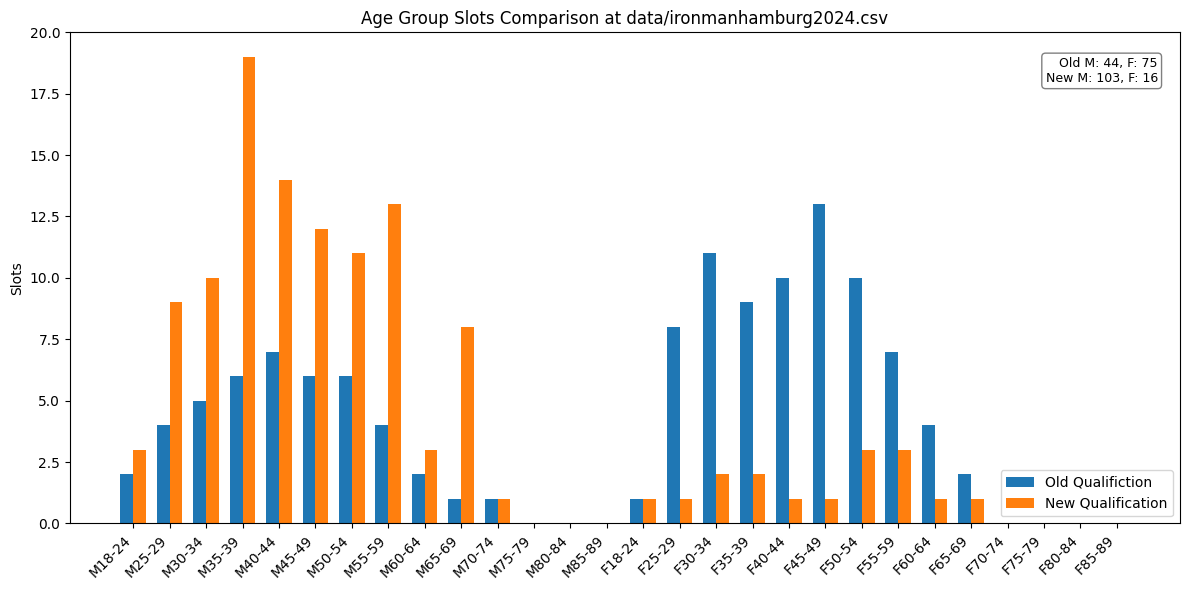

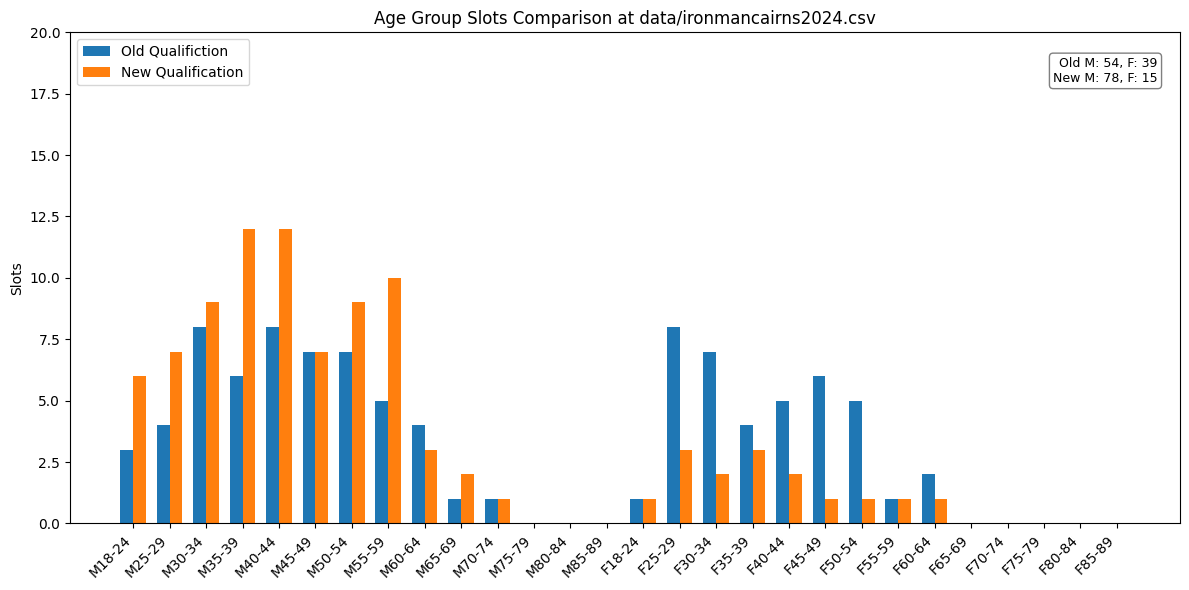

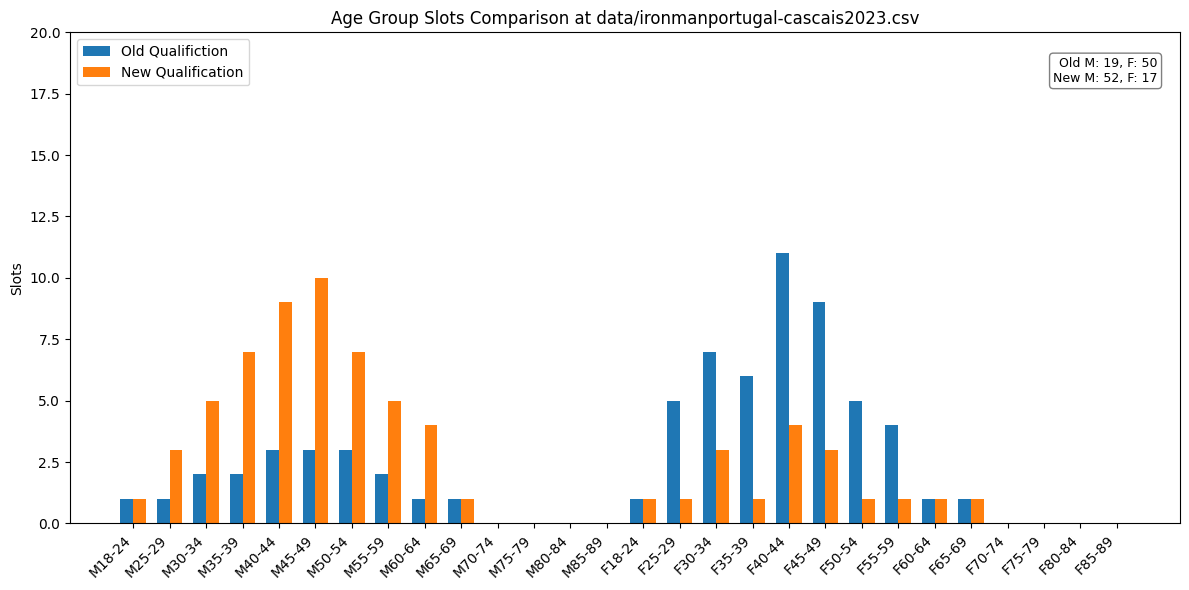

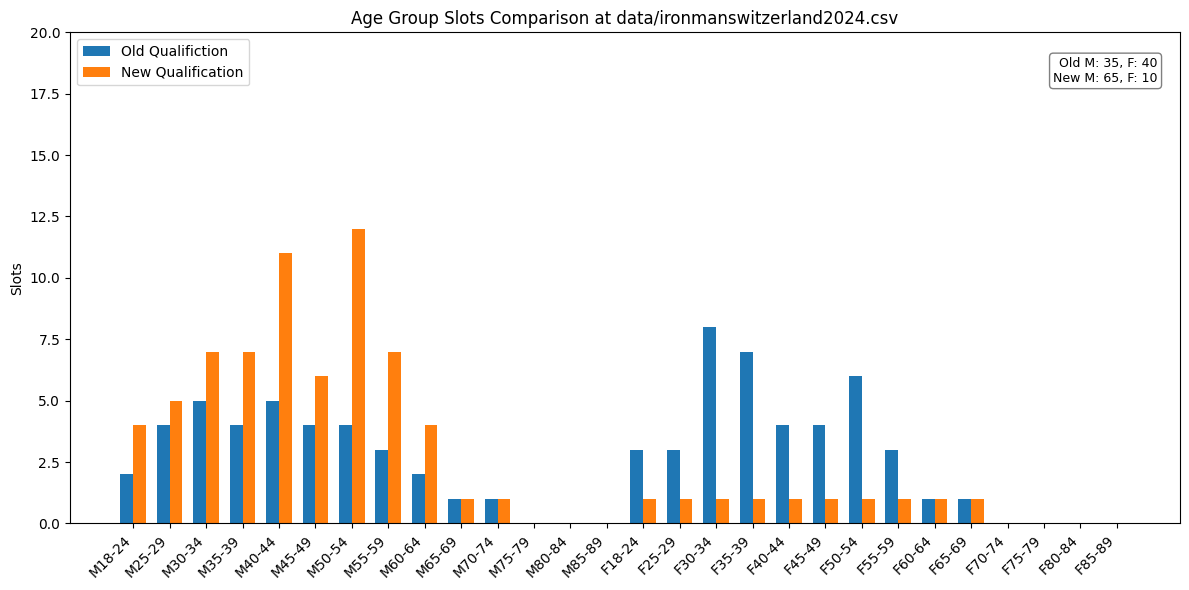

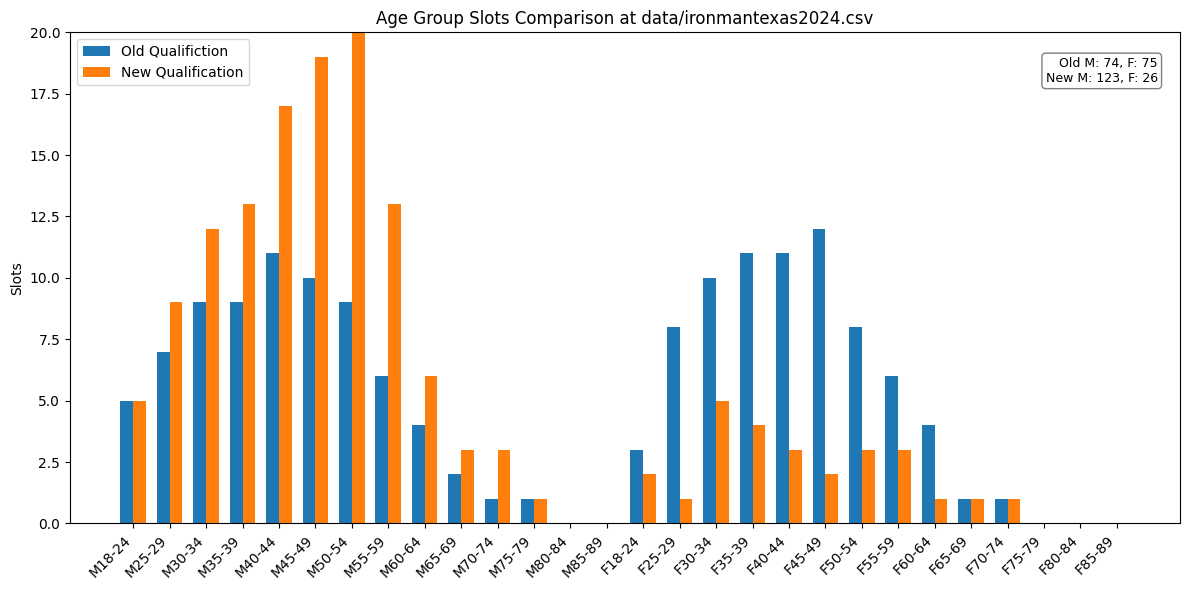

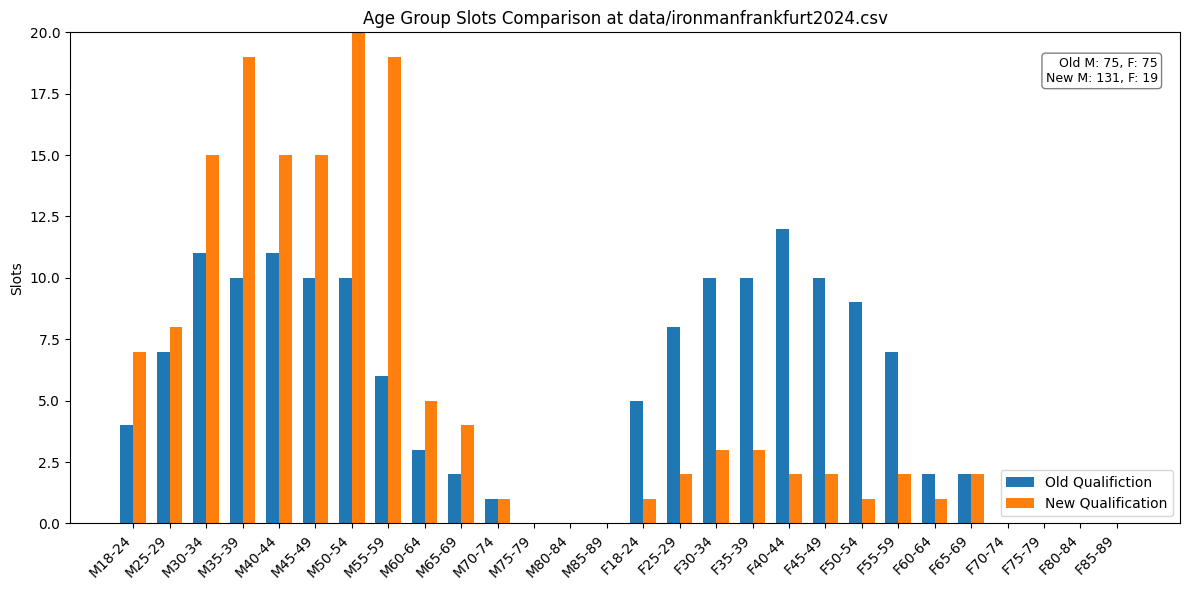

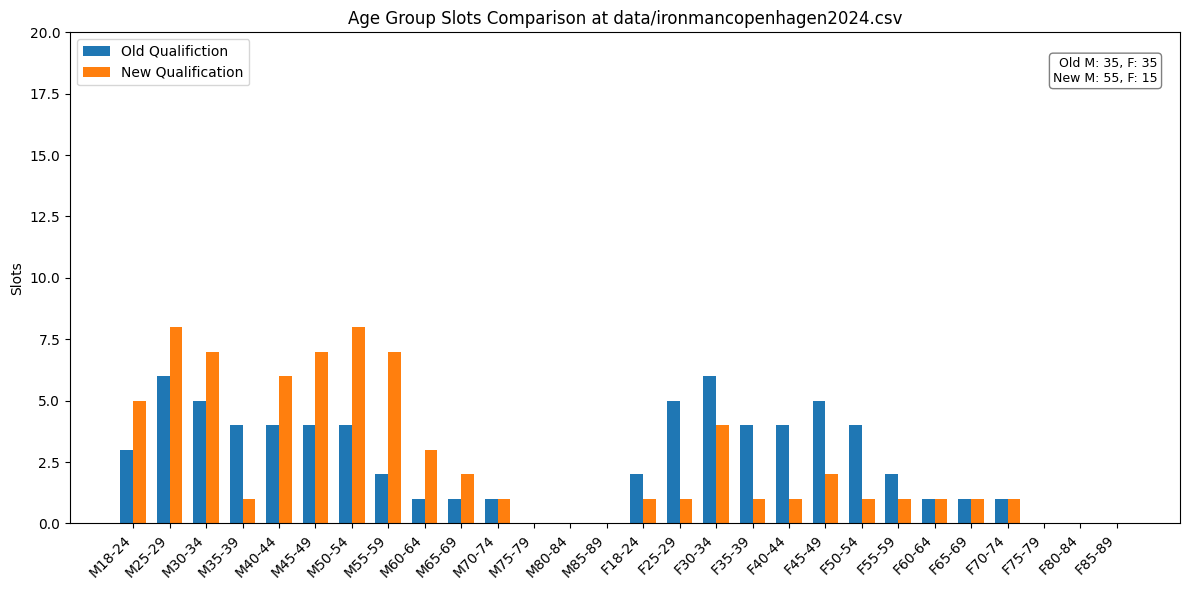

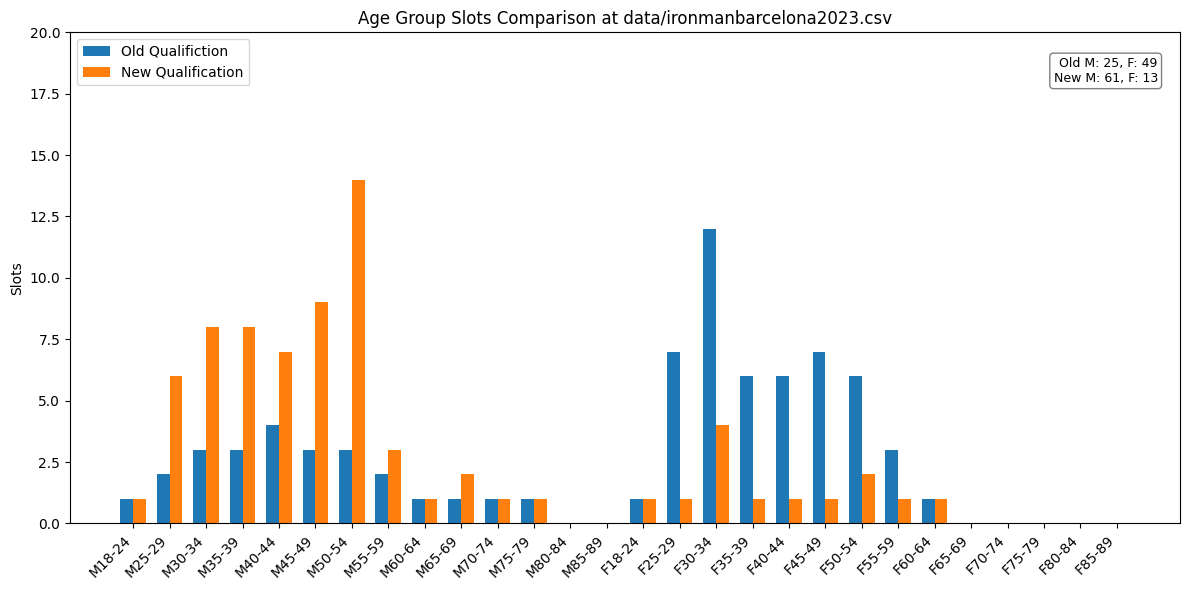

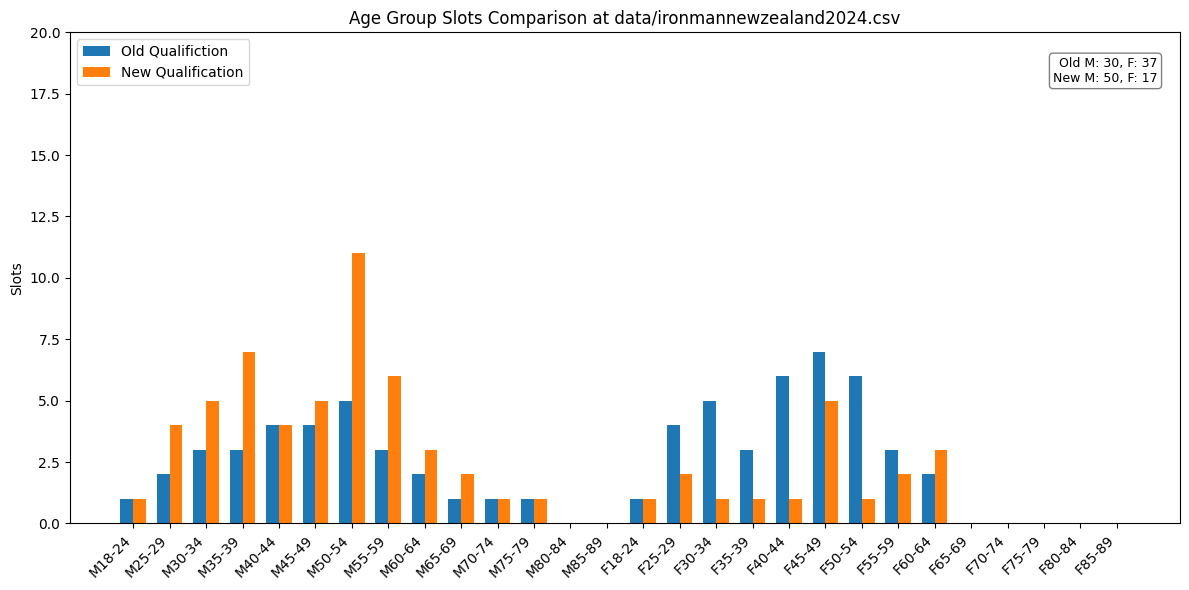

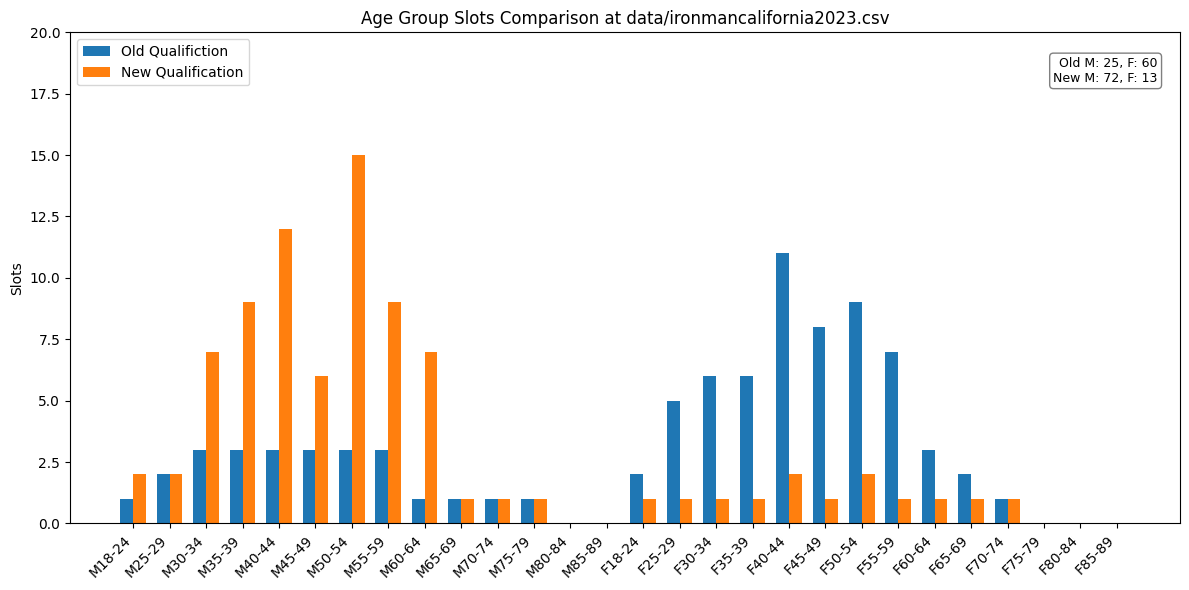

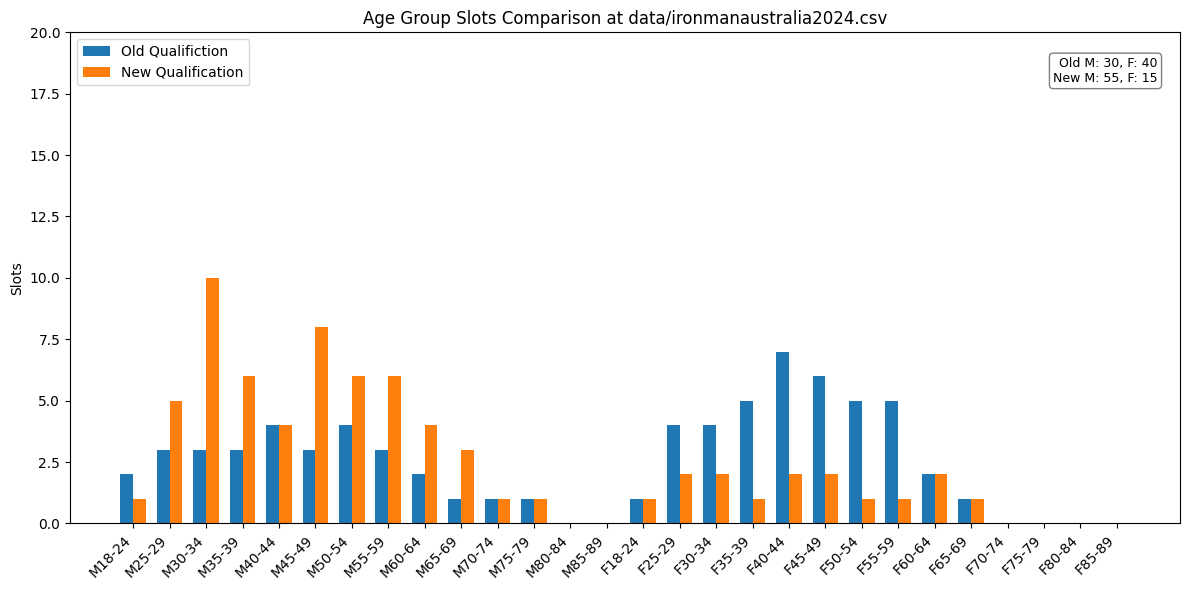

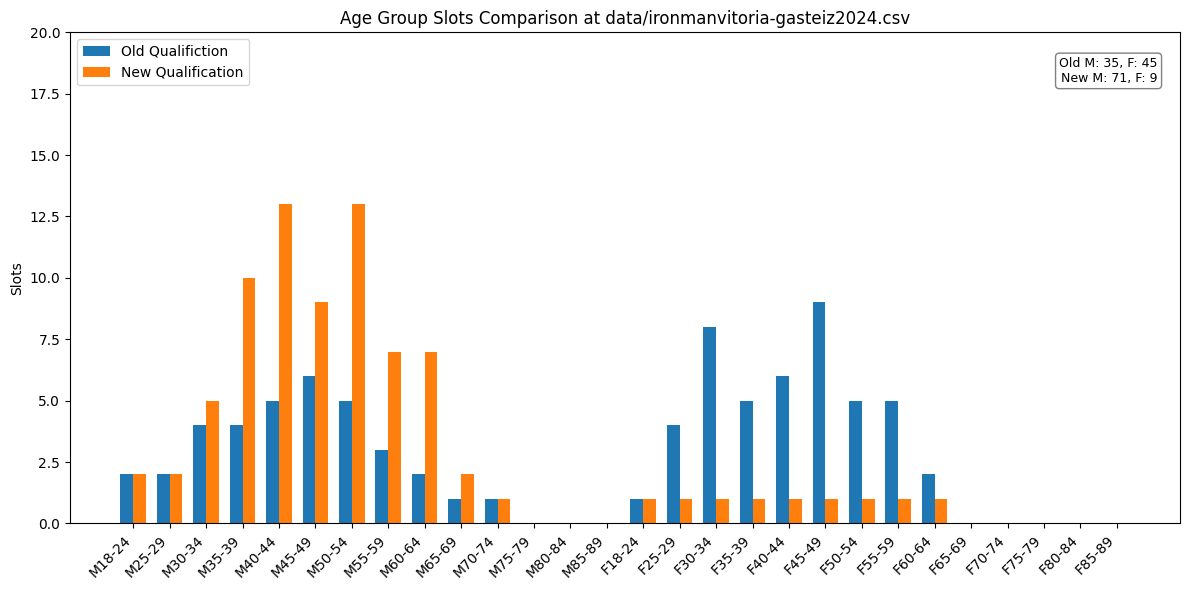

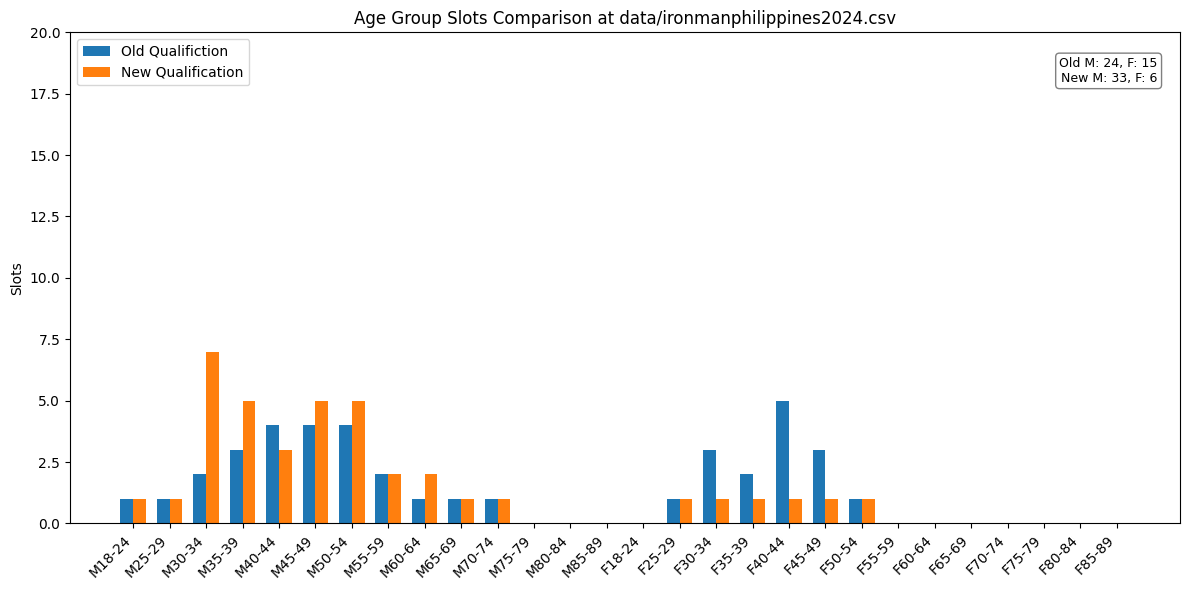

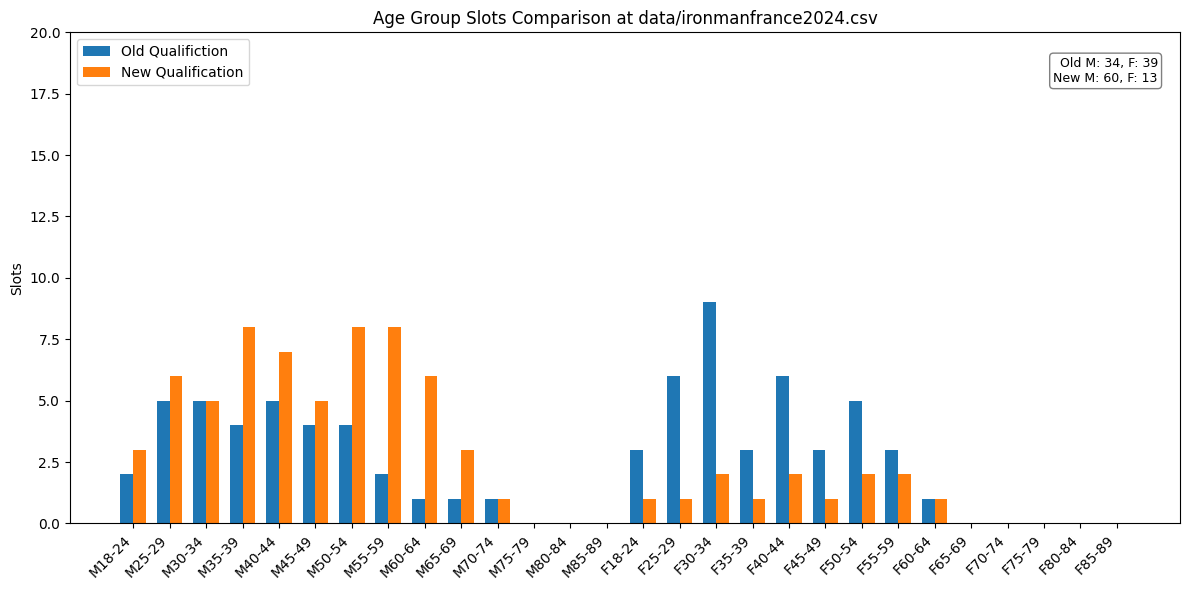

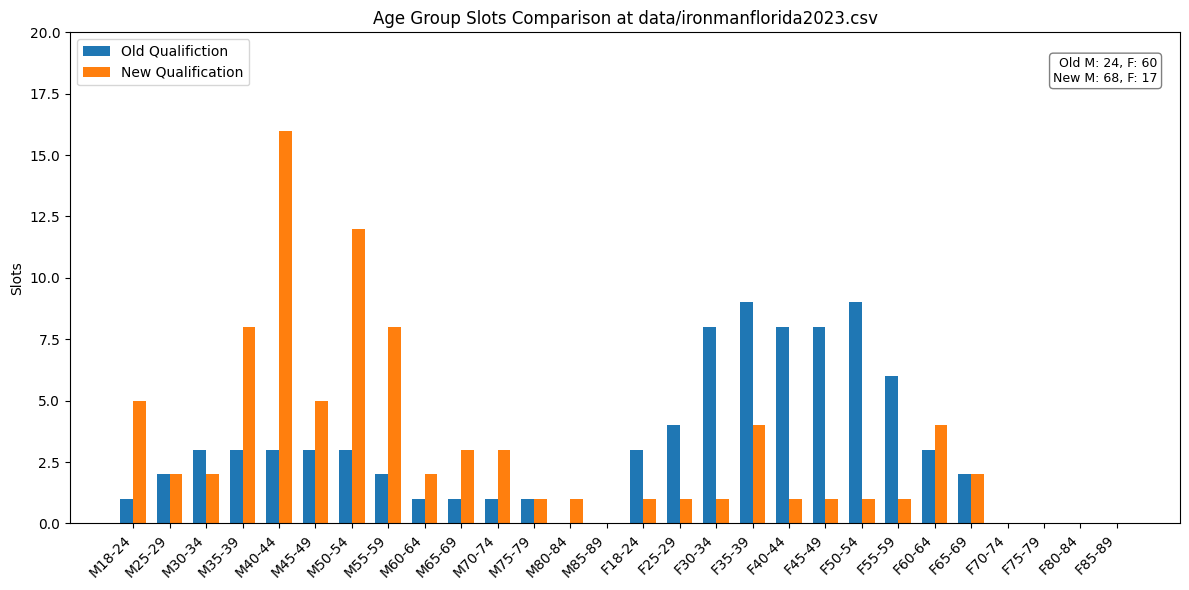

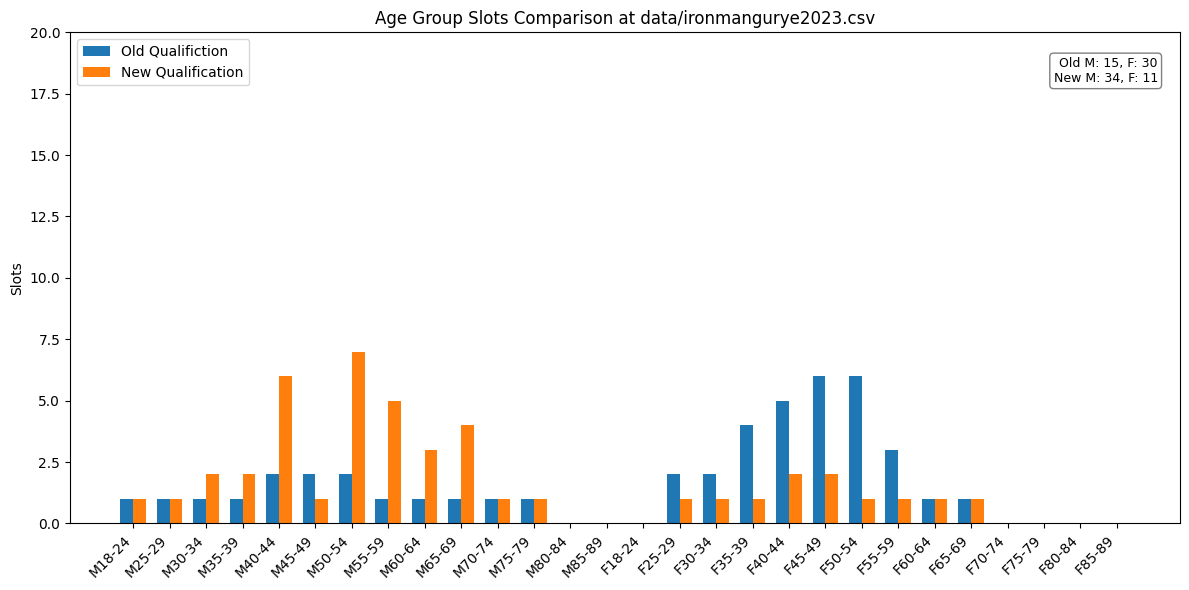

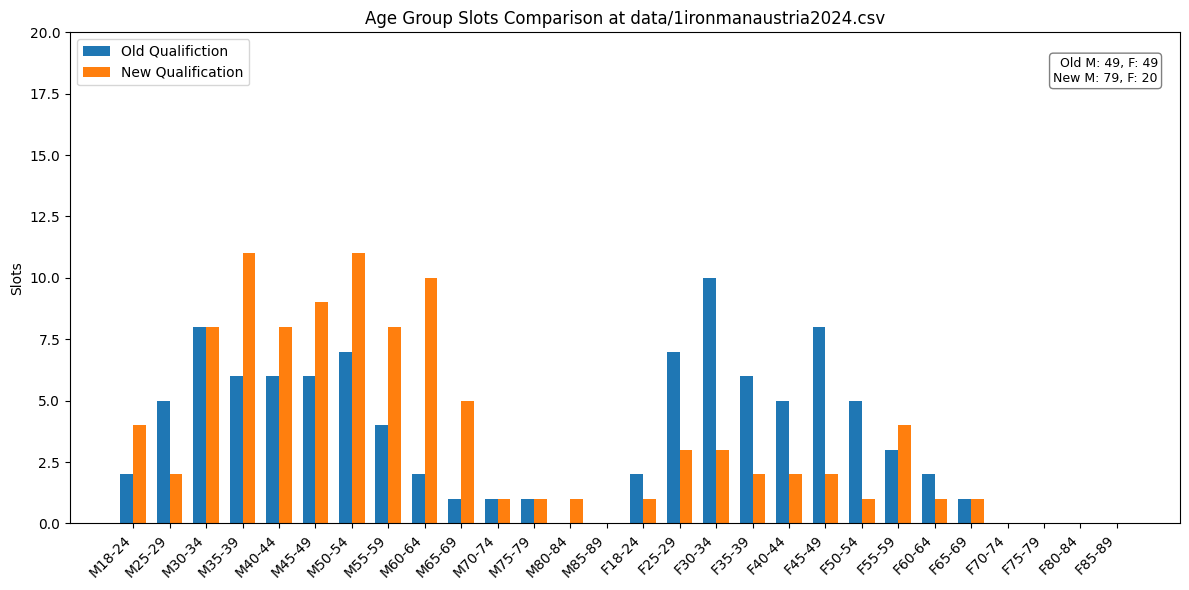

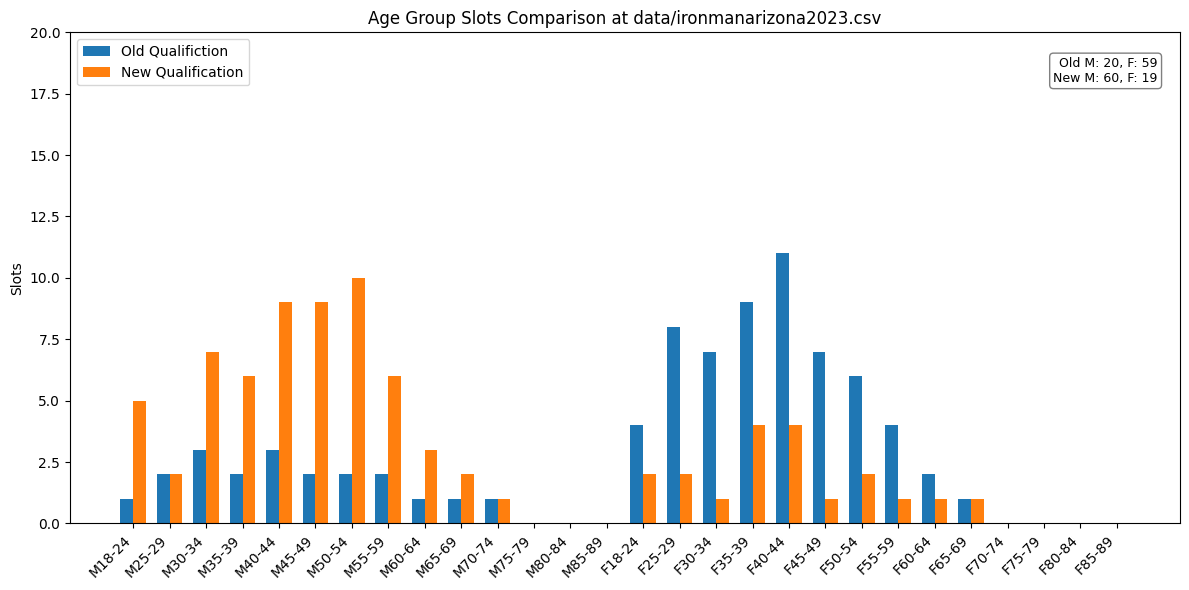

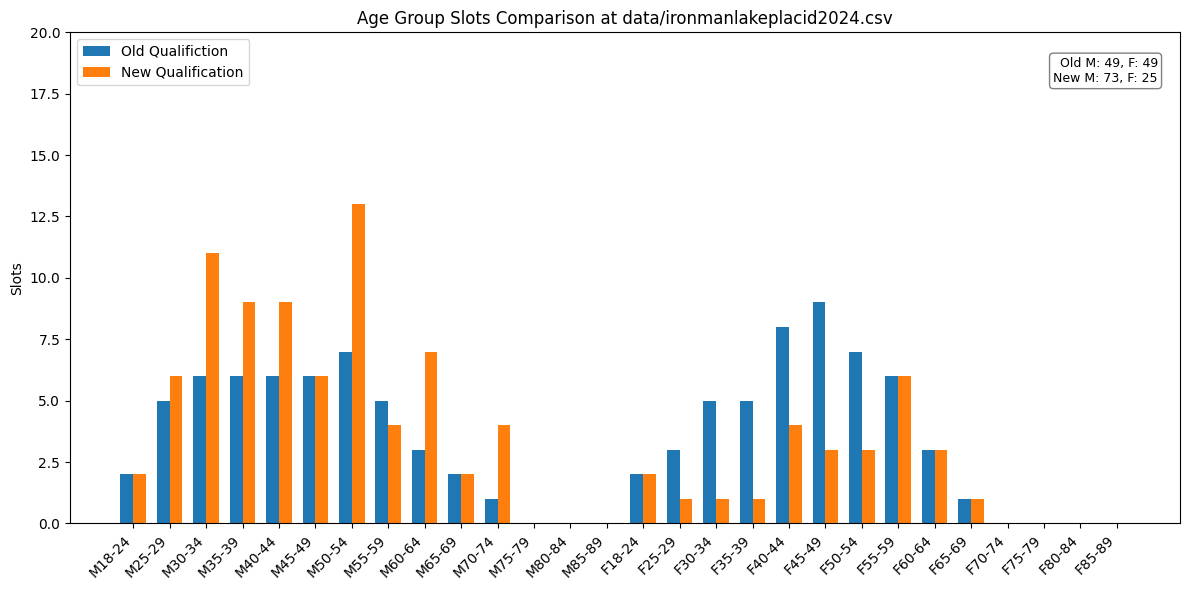

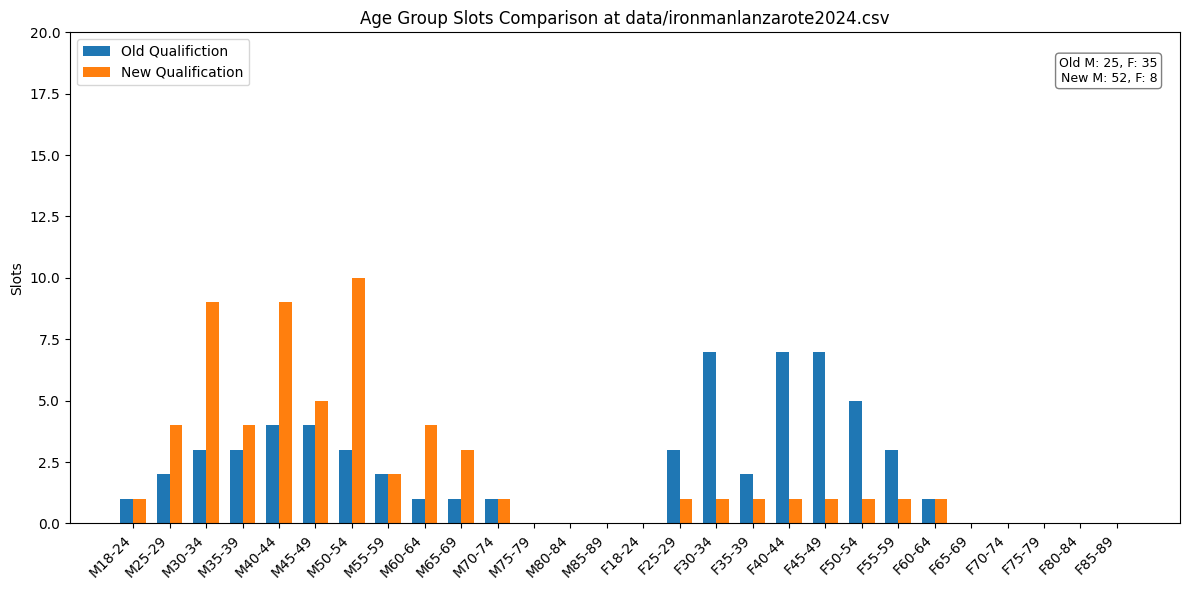

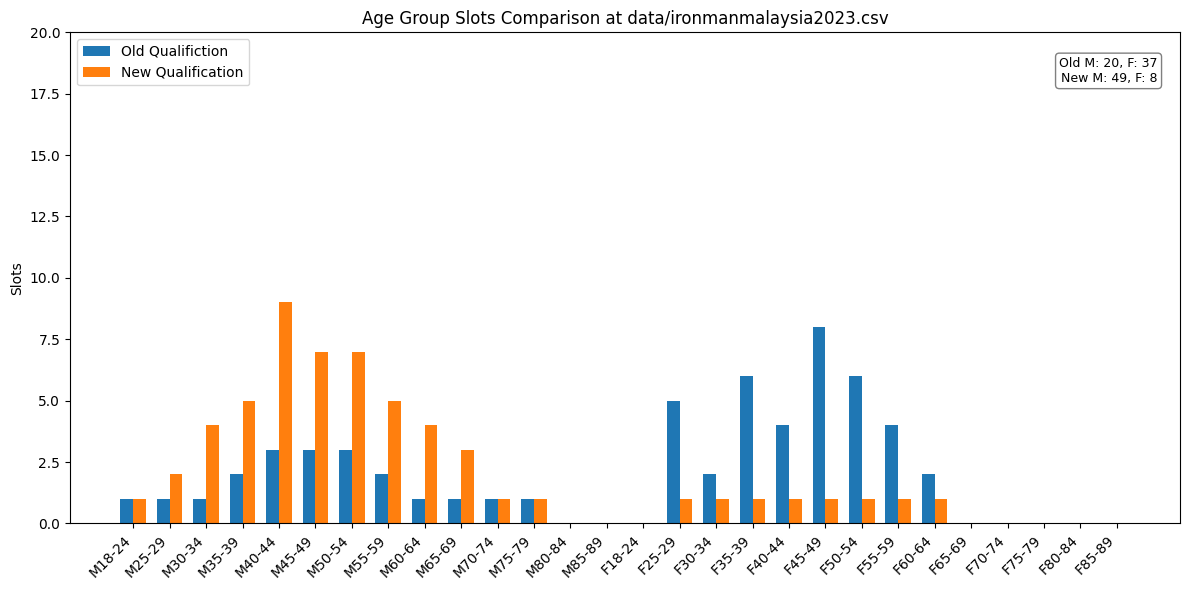

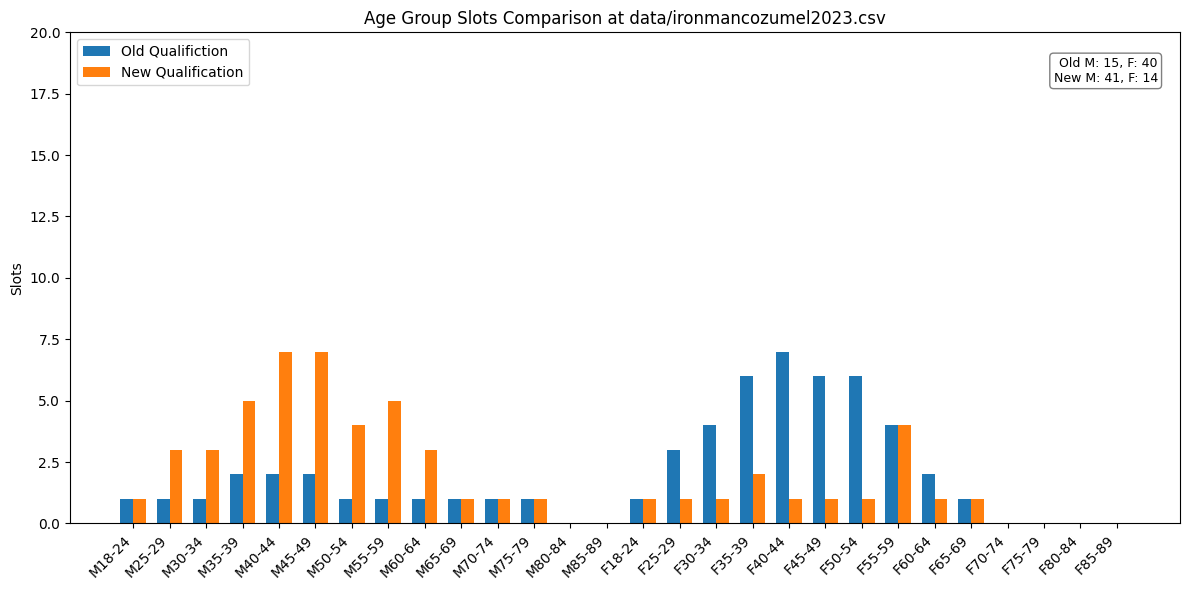

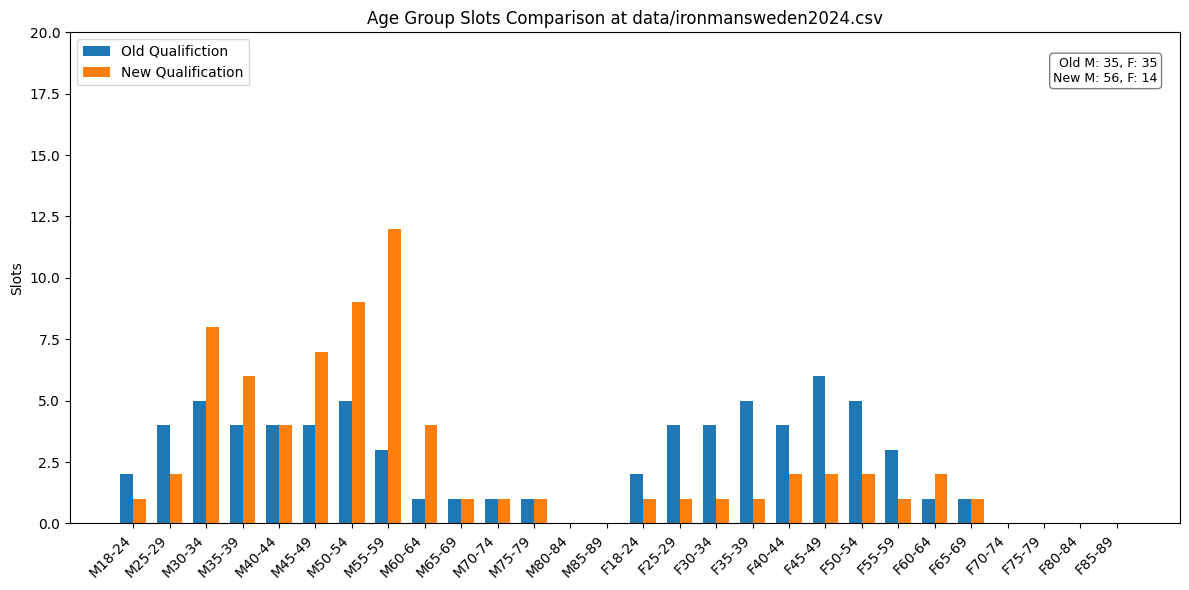

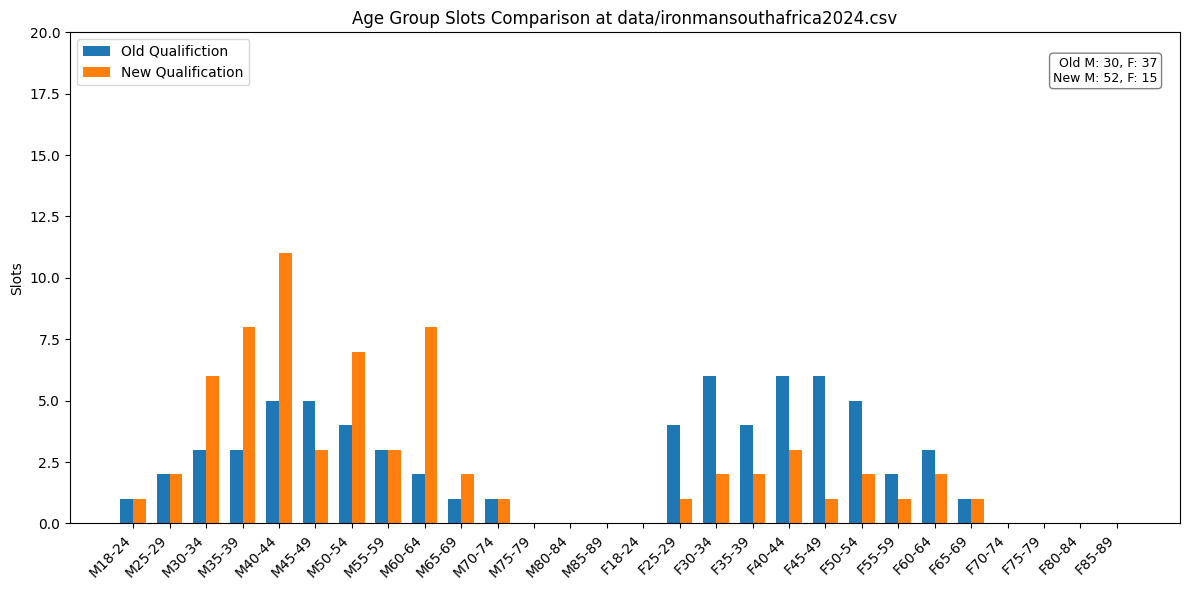

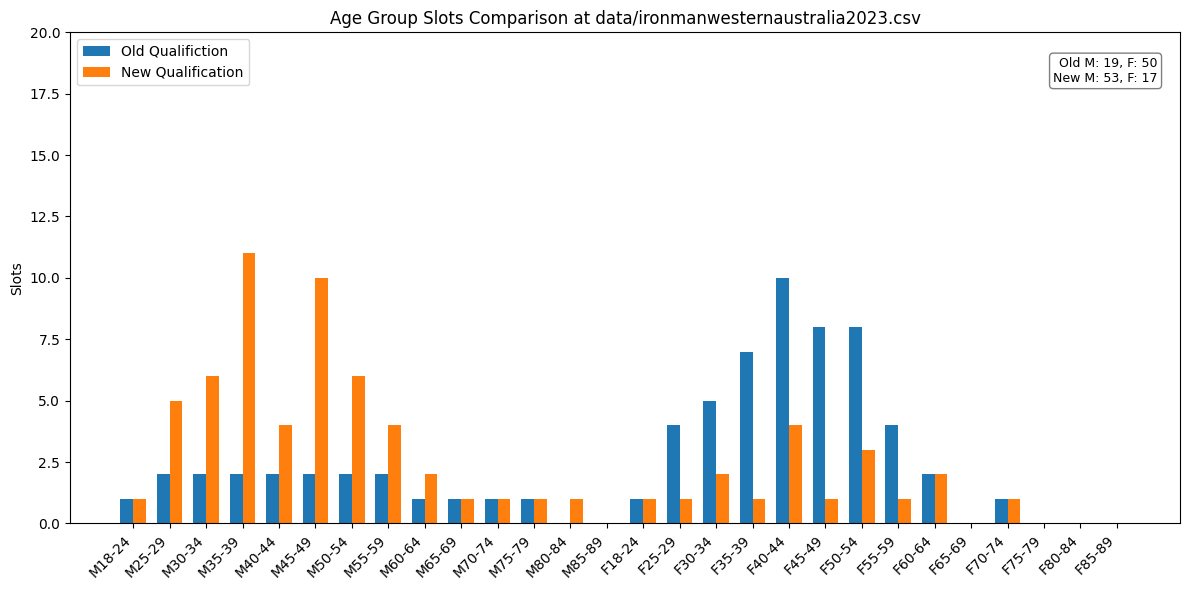

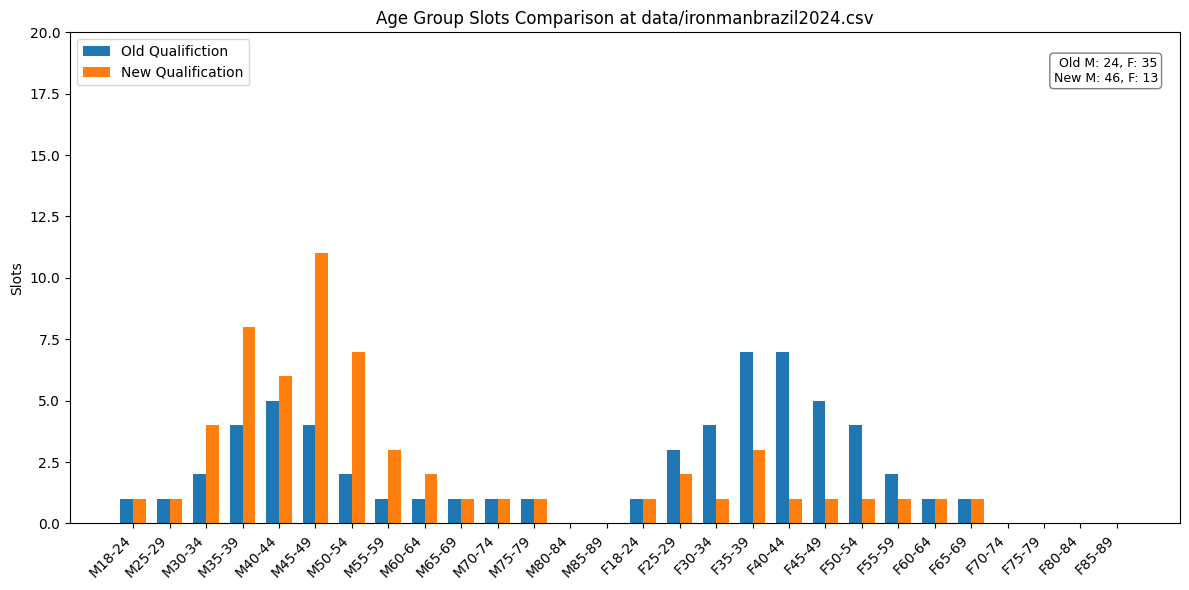

In [126]:
import glob
file_paths = glob.glob("data/*.csv")
frames = []
count = 0


data = {
    'Age Group': [
        'M18-24', 'M25-29', 'M30-34', 'M35-39', 'M40-44', 'M45-49',
        'M50-54', 'M55-59', 'M60-64', 'M65-69', 'M70-74', 'M75-79',
        'M80-84', 'M85-89',
        'F18-24', 'F25-29', 'F30-34', 'F35-39', 'F40-44', 'F45-49',
        'F50-54', 'F55-59', 'F60-64', 'F65-69', 'F70-74', 'F75-79',
        'F80-84', 'F85-89'
    ],
    'Multiplier': [
        0.9698, 0.9921, 1.0, 0.9895, 0.9683, 0.9401,
        0.9002, 0.8667, 0.8262, 0.7552, 0.6876, 0.6768,
        0.5555, 0.5416,
        0.8567, 0.8961, 0.8977, 0.8866, 0.8707, 0.8501,
        0.8125, 0.7778, 0.7218, 0.6828, 0.6439, 0.5521,
        None, None  
    ]
    }
df_Multiplier = pd.DataFrame(data)


total_old_agegroup = pd.DataFrame({'Total': pd.Series(0, df_Multiplier['Age Group'])})
total_new_agegroup = pd.DataFrame({'Total': pd.Series(0, df_Multiplier['Age Group'])})



for path in file_paths:
    df_race = pd.read_csv(path)
    df_race.drop(['Bib', 
    'Country',
    'Gender Rank',
    'Swim Time',
    'Swim Rank',
    'Gender Swim Rank',
    'Age Group Swim Rank',
    'Bike Time',
    'Bike Rank',
    'Gender Bike Rank',
    'Age Group Bike Rank',
    'Run Time', 
    'Gender Run Rank',
    'Age Group Run Rank',
    'Run Rank',
    'Transition 1 Time',
    'Transition 1 Rank',
    'Gender Transition 1 Rank',
    'Age Group Transition 1 Rank',
    'Transition 2 Time',
    'Transition 2 Rank',
    'Gender Transition 2 Rank',
    'Age Group Transition 2 Rank',
    'Qualifier Time'], axis=1, inplace=True )

    qualified_count = df_race['Qualified'].eq(1).sum()
    df_OldKQ = df_race[df_race['Qualified'] == 1].groupby('Division')
    old_KQ_agegroup = df_race[df_race['Qualified'] == 1].groupby('Division').size()

    

    df_race = df_race.merge(df_Multiplier, left_on='Division', right_on='Age Group', how='left')
    df_race['Time_seconds'] = pd.to_timedelta(df_race['Overall Time']).dt.total_seconds()
    df_race['GradedTimeseconds'] = df_race['Time_seconds'] * df_race['Multiplier']

    df_race = df_race[~df_race['Division'].isin(['MPRO', 'FPRO'])]
    newKQ = df_race[df_race['Age Group Rank'] == 1].copy()
    winnercount = newKQ['Qualified'].eq(1).sum()

    to_remove = ['DNF', 'DQ', 'DNS']
    df_race = df_race[~df_race['Finish'].isin(to_remove)]
    df_race = df_race[df_race['Age Group Rank'] != 1]
    df_race = df_race.sort_values(by='GradedTimeseconds')
 

    new_Q_count = qualified_count - winnercount
    newKQ = pd.concat([newKQ, df_race.head(new_Q_count)], ignore_index=True)
    new_KQ_agegroup = newKQ.groupby('Division').size()

    
    old_KQ_agegroup = old_KQ_agegroup.reindex(df_Multiplier['Age Group'], fill_value=0)
    new_KQ_agegroup = new_KQ_agegroup.reindex(df_Multiplier['Age Group'], fill_value=0)

    old_KQ_gender = old_KQ_agegroup.groupby(lambda x: x[0]).sum()
    new_KQ_gender = new_KQ_agegroup.groupby(lambda x: x[0]).sum()

    
    old_KQ_df = pd.DataFrame({'Total': old_KQ_agegroup})
    new_KQ_df = pd.DataFrame({'Total': new_KQ_agegroup})

    total_old_agegroup = total_old_agegroup.add(old_KQ_df, fill_value=0)
    total_new_agegroup = total_new_agegroup.add(new_KQ_df, fill_value=0)

    # Combine both series into one DataFrame, aligning on index (Divisions)
    df_compare = pd.DataFrame({
        'Dataset 1': old_KQ_agegroup,
        'Dataset 2': new_KQ_agegroup
    })

   
    labels = df_compare.index
    x = np.arange(len(labels)) 
    width = 0.35  

    fig, ax = plt.subplots(figsize=(12, 6))
    bars1 = ax.bar(x - width/2, df_compare['Dataset 1'], width, label='Old Qualifiction')
    bars2 = ax.bar(x + width/2, df_compare['Dataset 2'], width, label='New Qualification')

    ax.set_ylabel('Slots')
    ax.set_title('Age Group Slots Comparison at ' + path)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=45, ha='right')
    ax.set_ylim([0, 20])

    ax.legend()
    summary_text = (
    f"Old M: {old_KQ_gender.get('M', 0)}, F: {old_KQ_gender.get('F', 0)}\n"
    f"New M: {new_KQ_gender.get('M', 0)}, F: {new_KQ_gender.get('F', 0)}"
    )
    ax.text(0.98, 0.95, summary_text,
        transform=ax.transAxes,
        ha='right', va='top',
        fontsize=9,
        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='gray'))

    plt.tight_layout()
    plt.show()



2057
2054


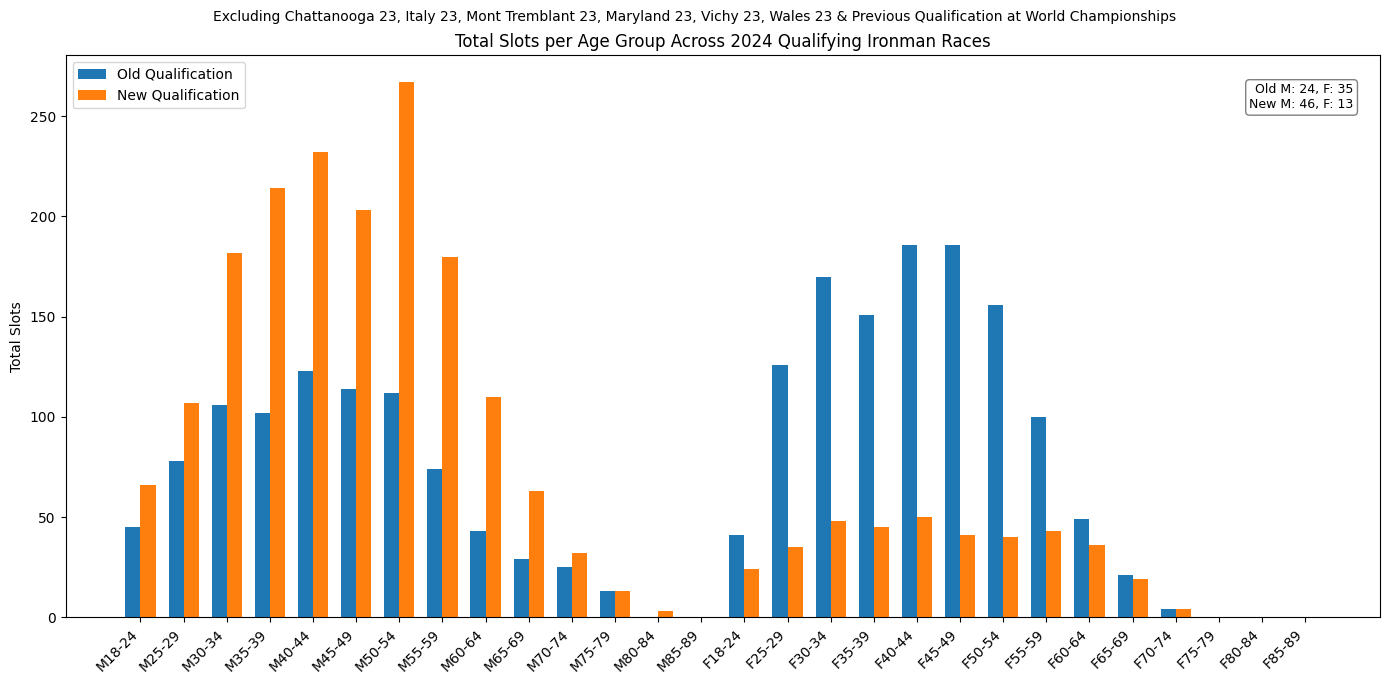

In [127]:
print(total_new_agegroup['Total'].sum())
print(total_old_agegroup['Total'].sum())

df_compare_total = pd.DataFrame({
    'Old Qualification': total_old_agegroup['Total'],
    'New Qualification': total_new_agegroup['Total']
})


labels = df_compare_total.index
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(14, 7))
ax.bar(x - width/2, df_compare_total['Old Qualification'], width, label='Old Qualification')
ax.bar(x + width/2, df_compare_total['New Qualification'], width, label='New Qualification')

ax.set_ylabel('Total Slots')
fig.suptitle('Excluding Chattanooga 23, Italy 23, Mont Tremblant 23, Maryland 23, Vichy 23, Wales 23 & Previous Qualification at World Championships', fontsize=10, y=0.97)
ax.set_title('Total Slots per Age Group Across 2024 Qualifying Ironman Races')

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
total_old_gender = total_old_agegroup['Total'].groupby(lambda x: x[0]).sum()
total_new_gender = total_new_agegroup['Total'].groupby(lambda x: x[0]).sum()

summary_text = (
    f"Old M: {int(total_old_gender.get('M', 0))}, F: {int(total_old_gender.get('F', 0))}\n"
    f"New M: {int(total_new_gender.get('M', 0))}, F: {int(total_new_gender.get('F', 0))}"
)
ax.text(0.98, 0.95, summary_text,
        transform=ax.transAxes,
        ha='right', va='top',
        fontsize=9,
        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='gray'))
plt.show()

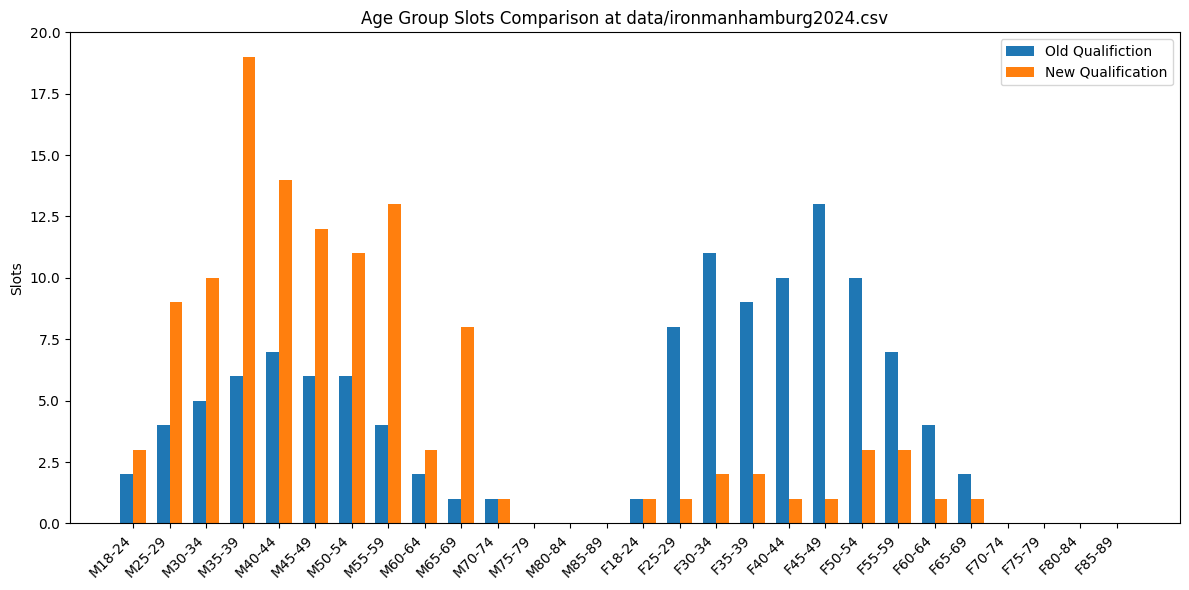

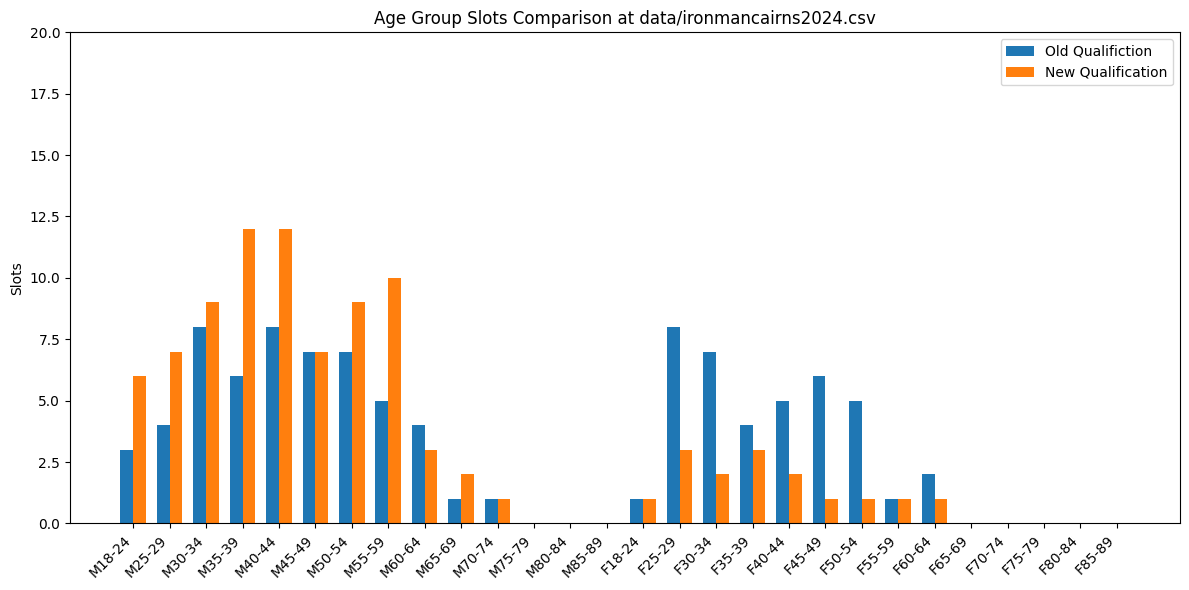

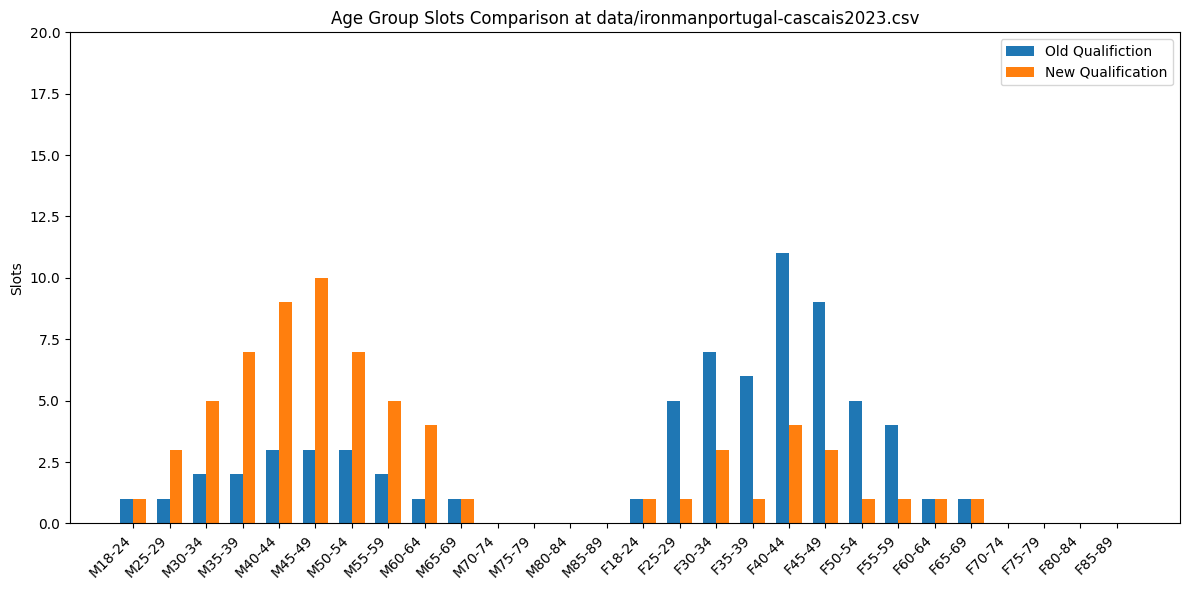

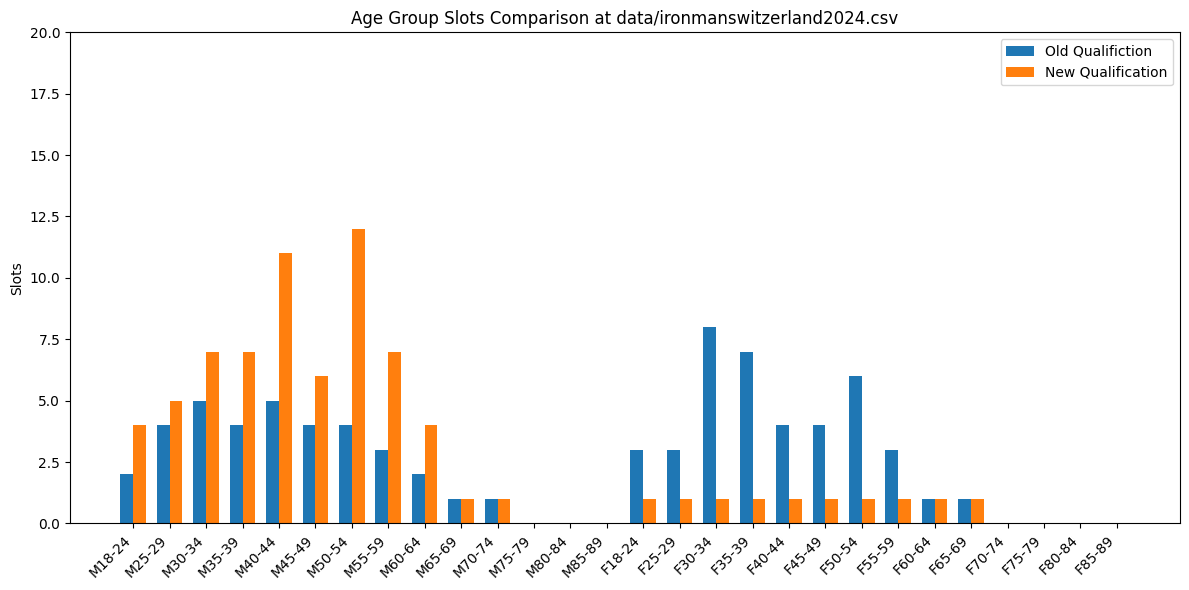

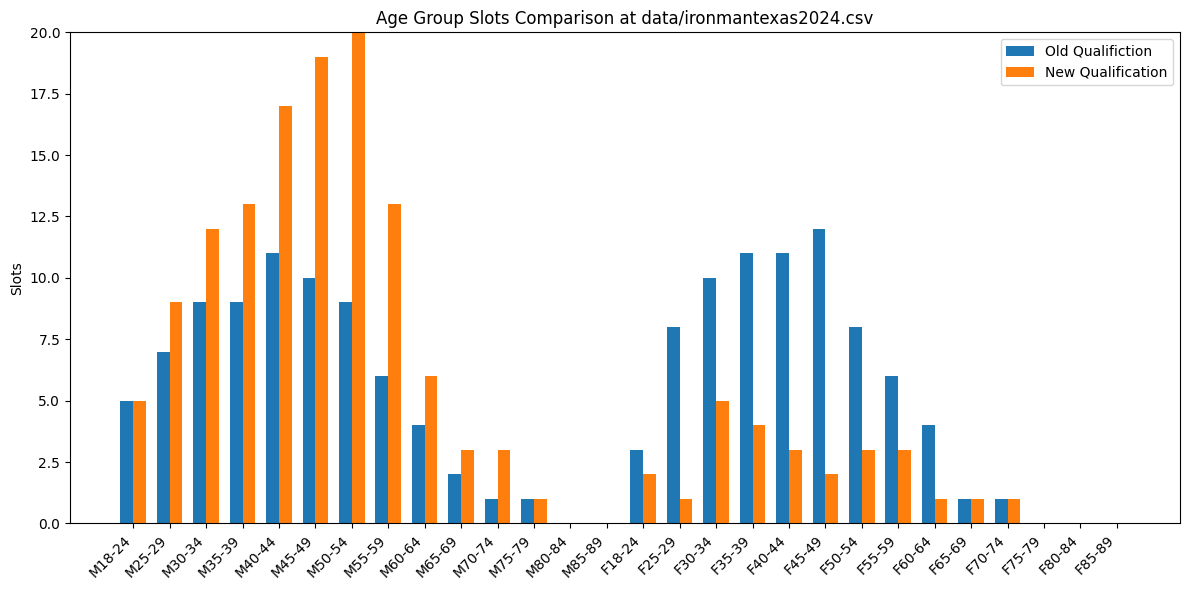

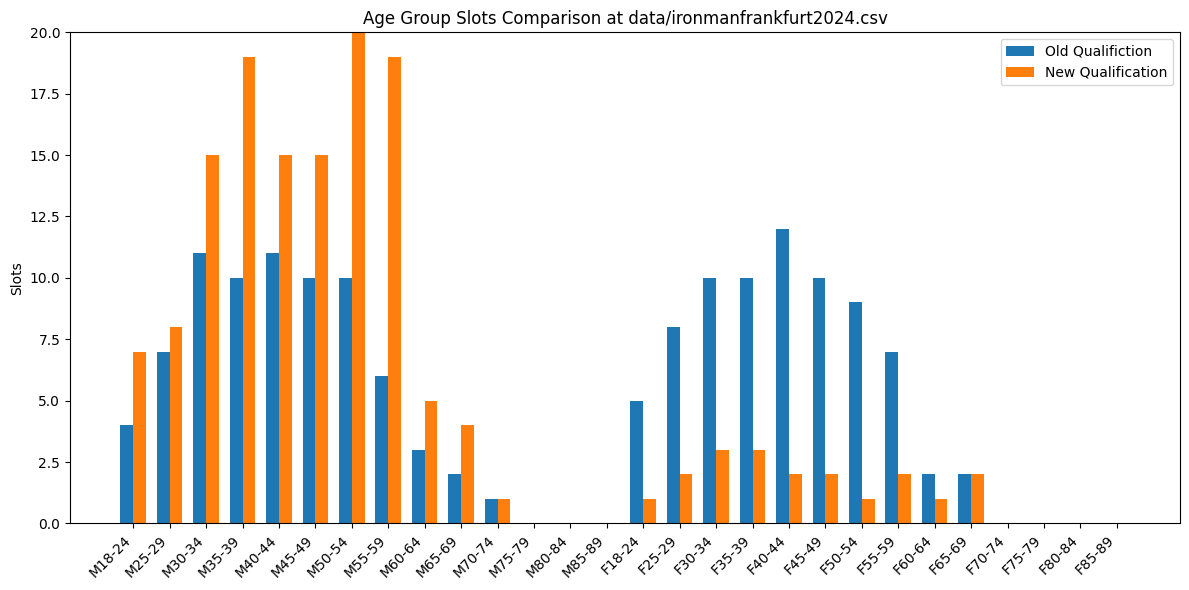

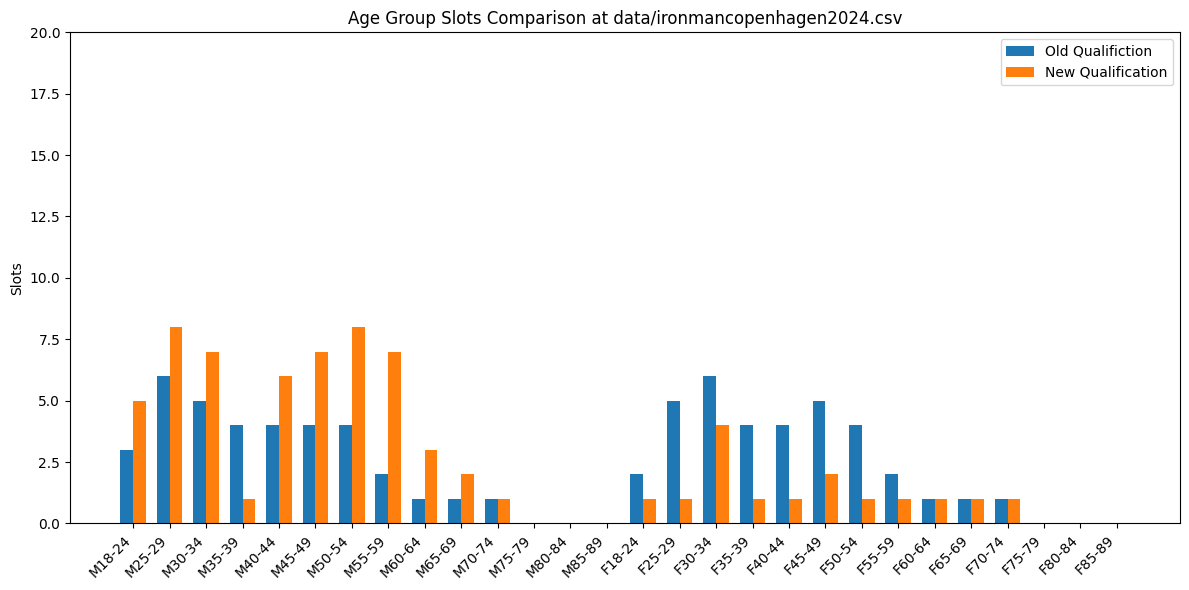

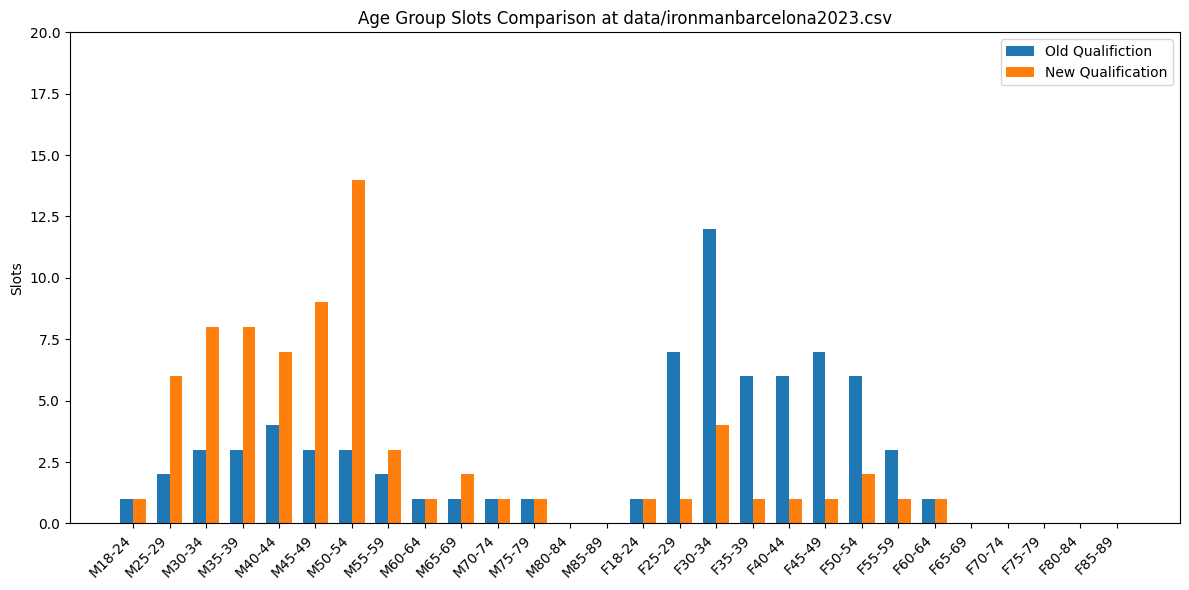

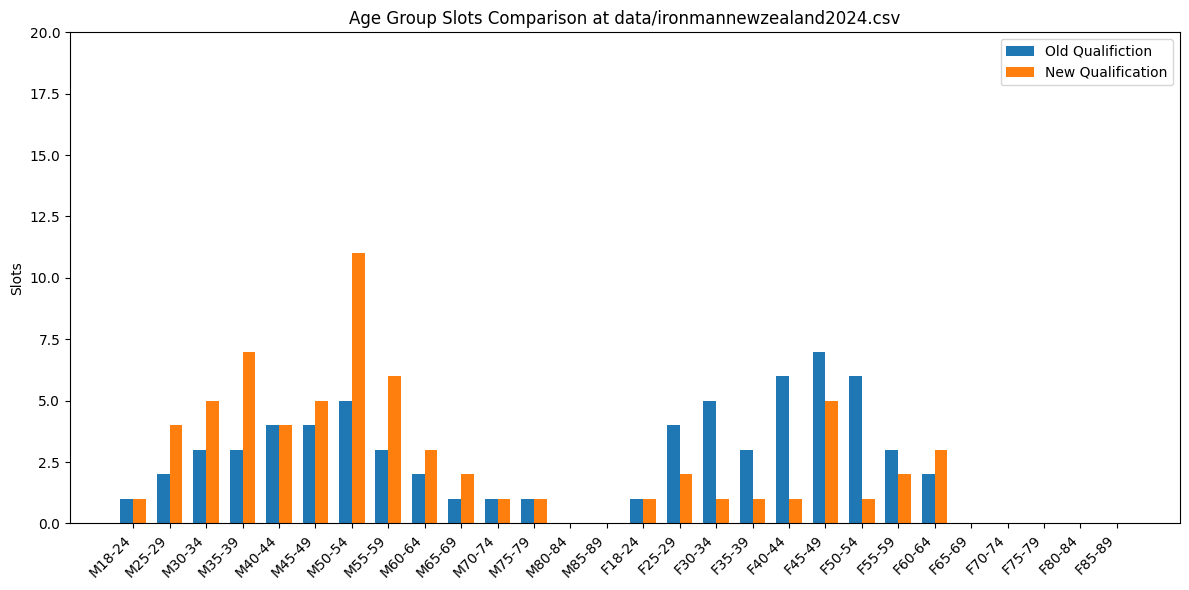

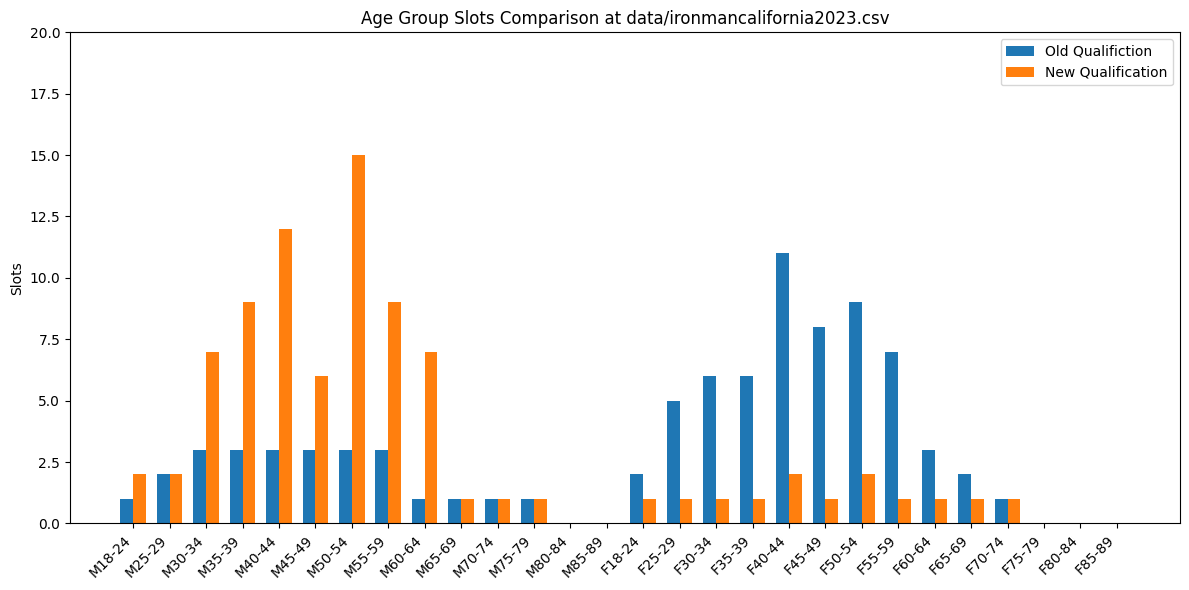

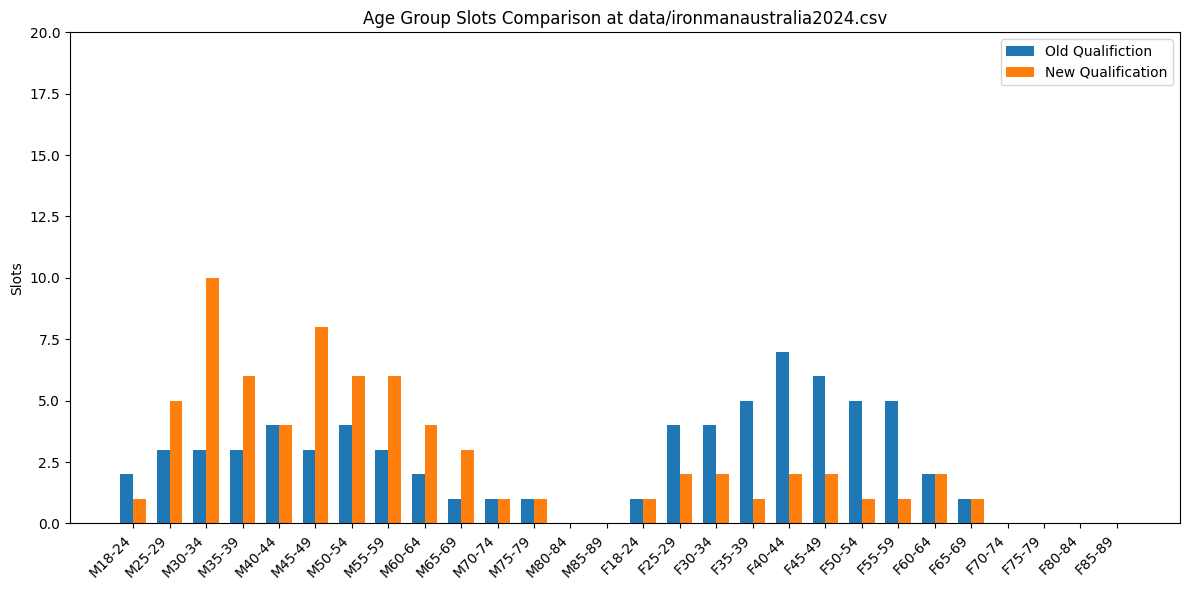

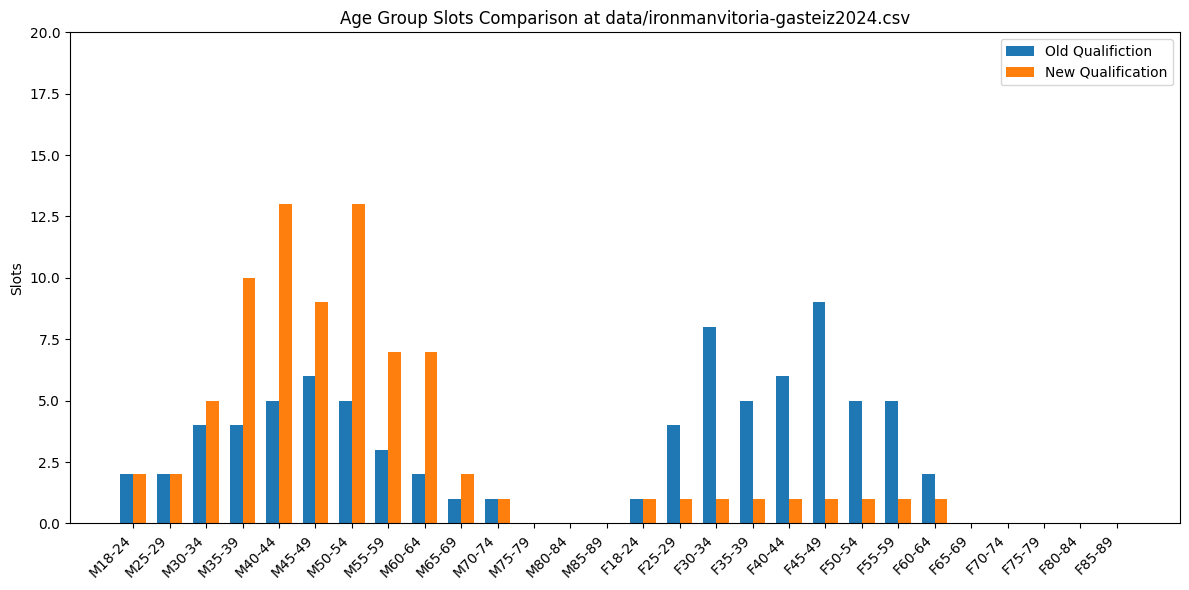

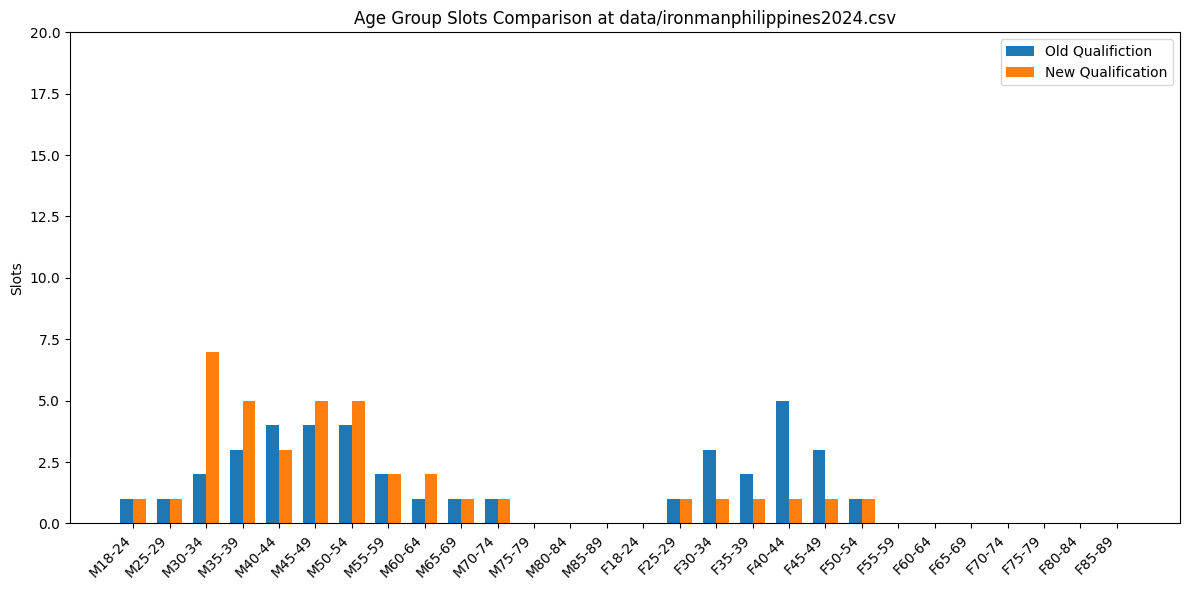

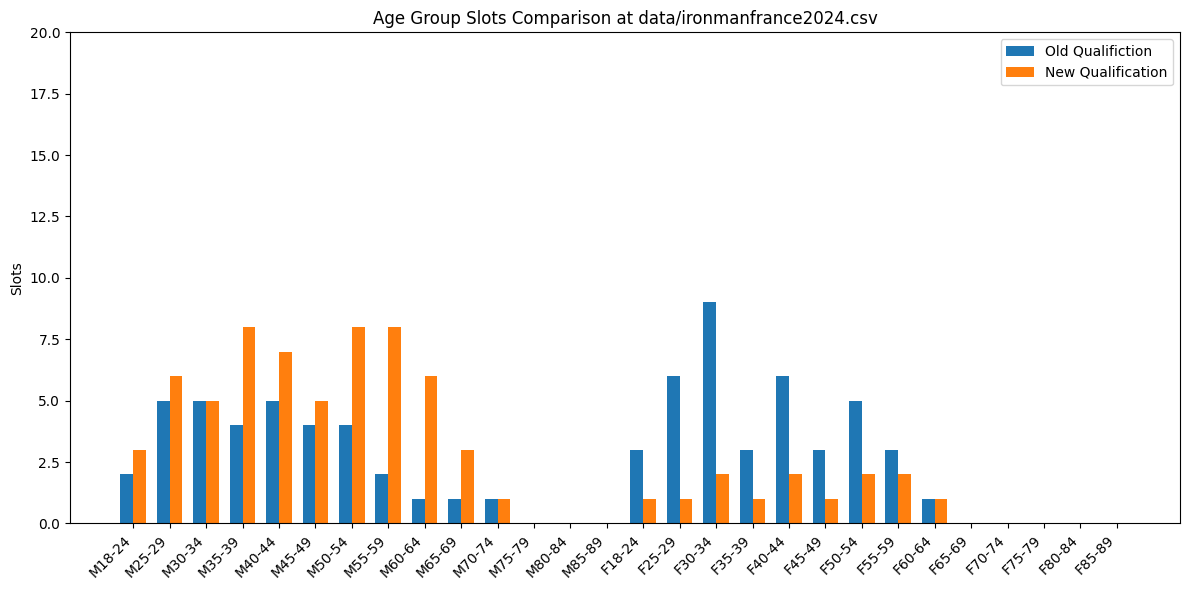

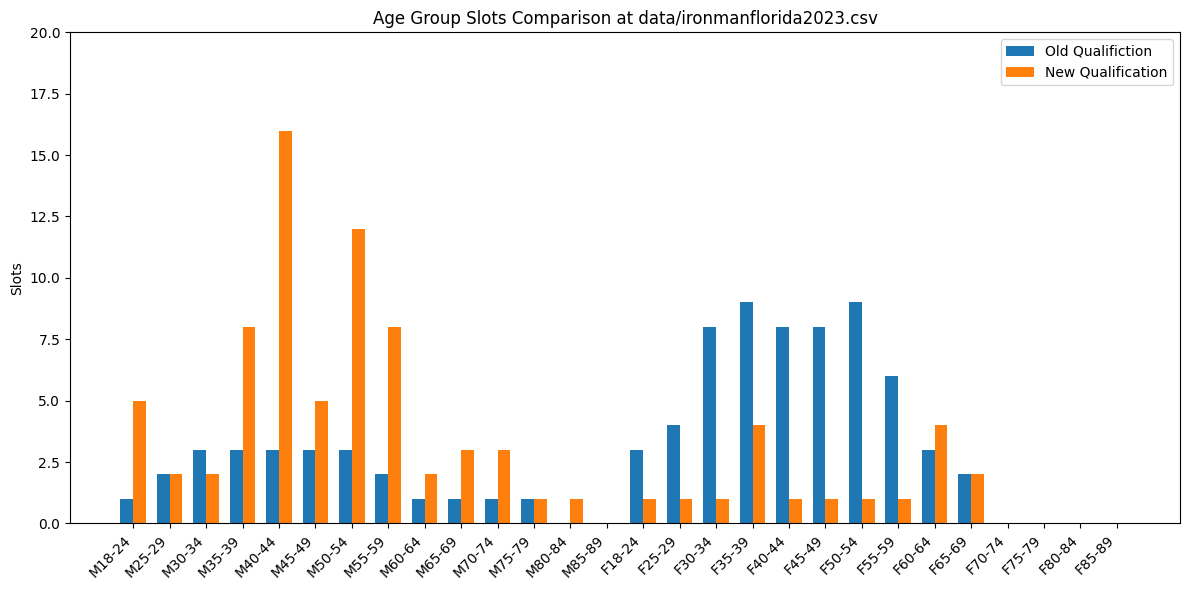

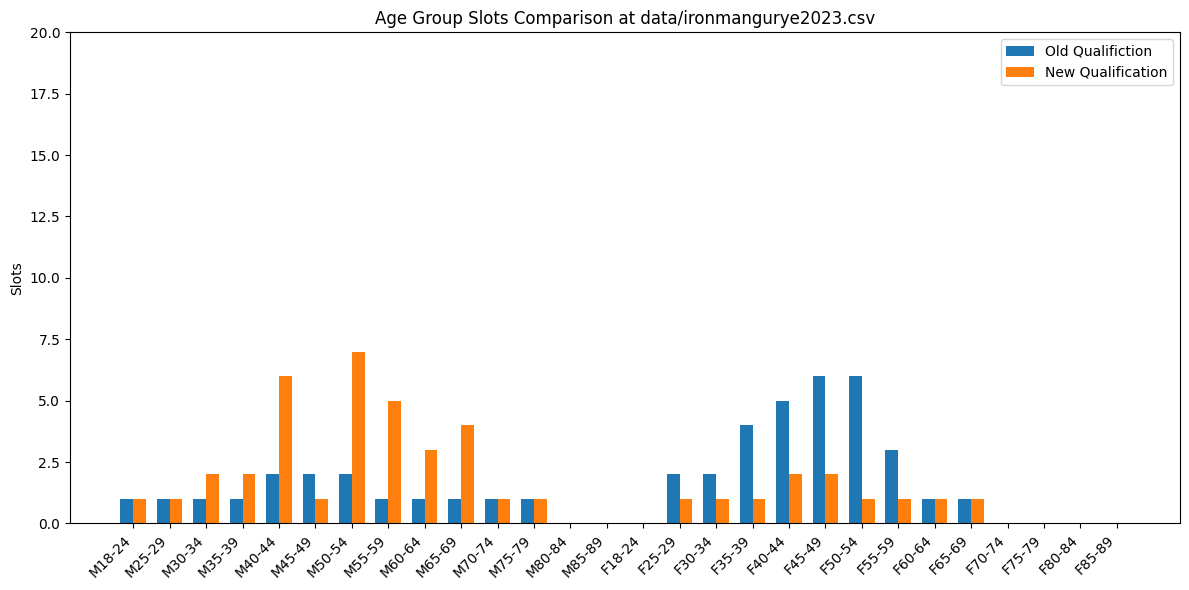

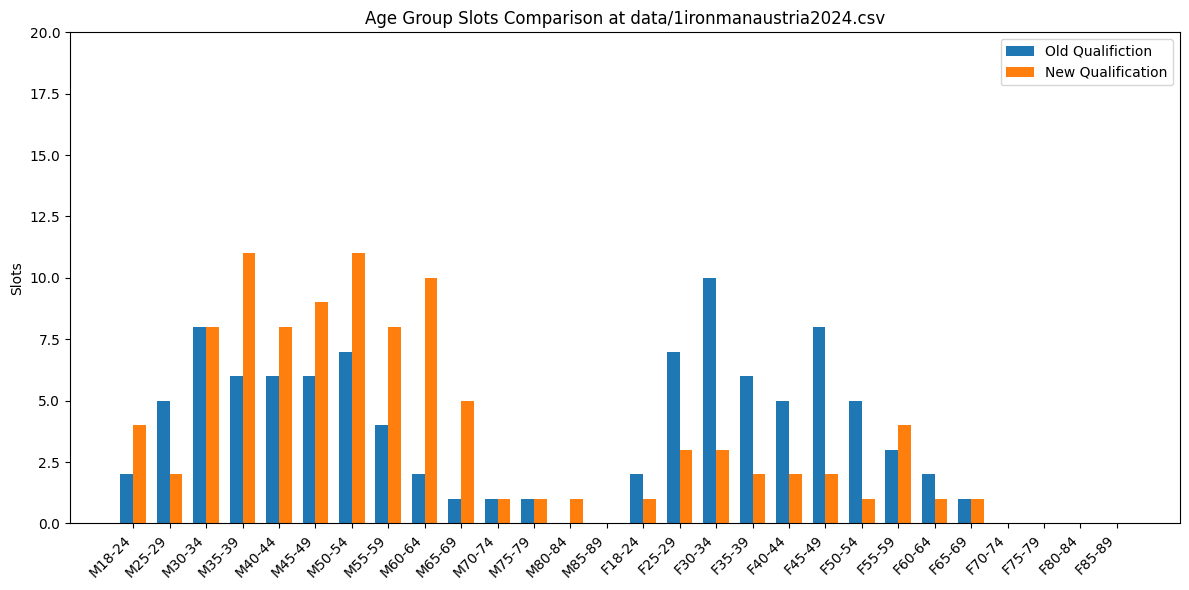

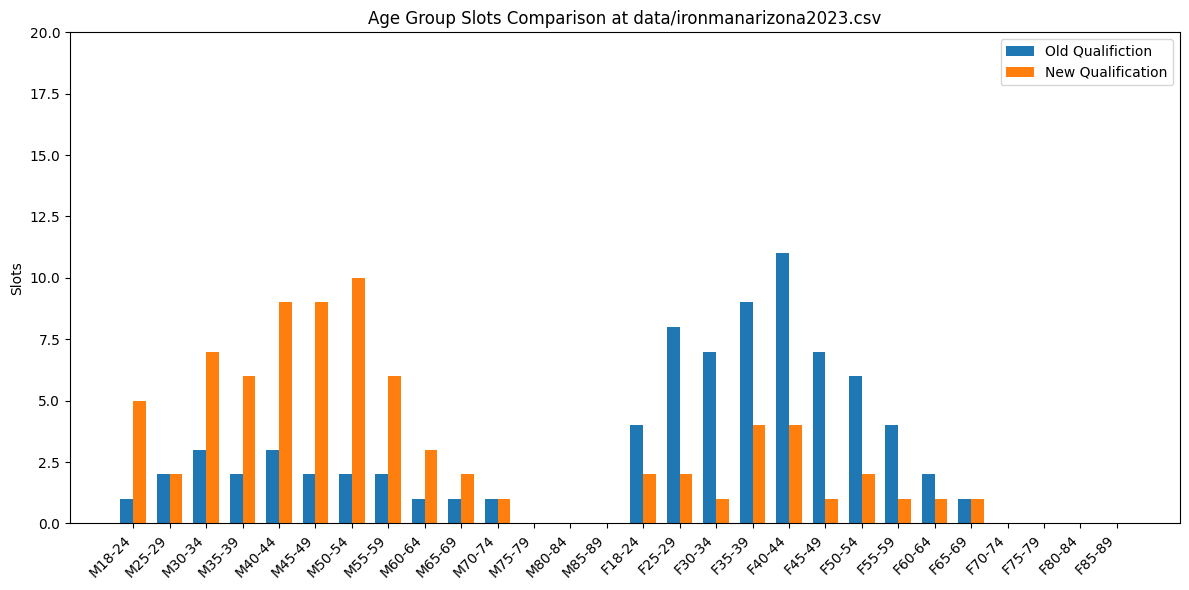

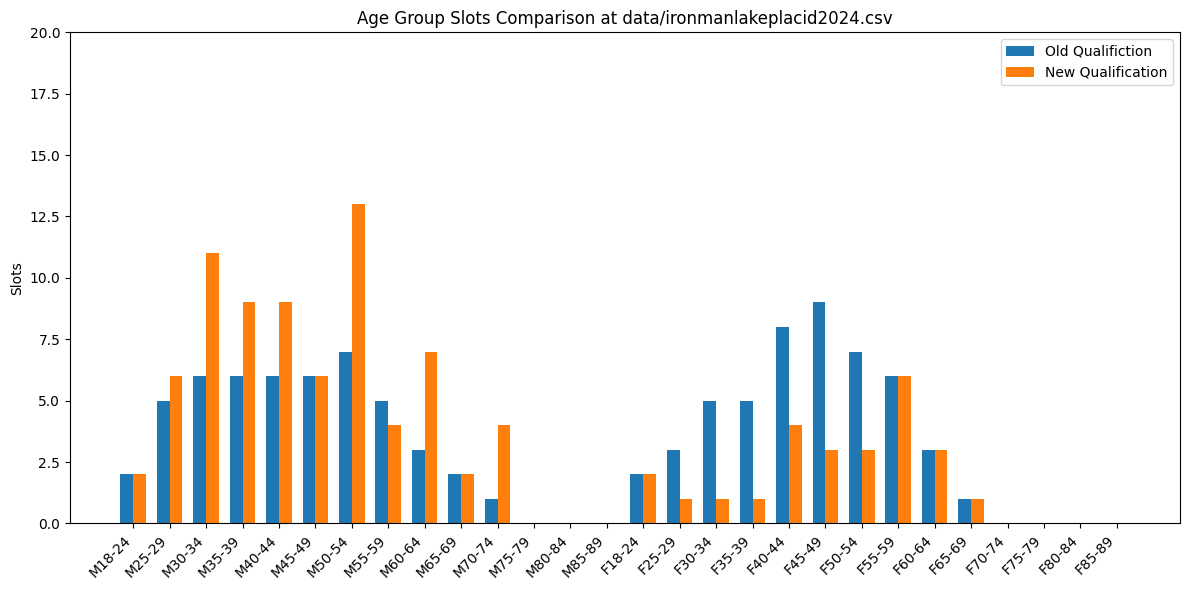

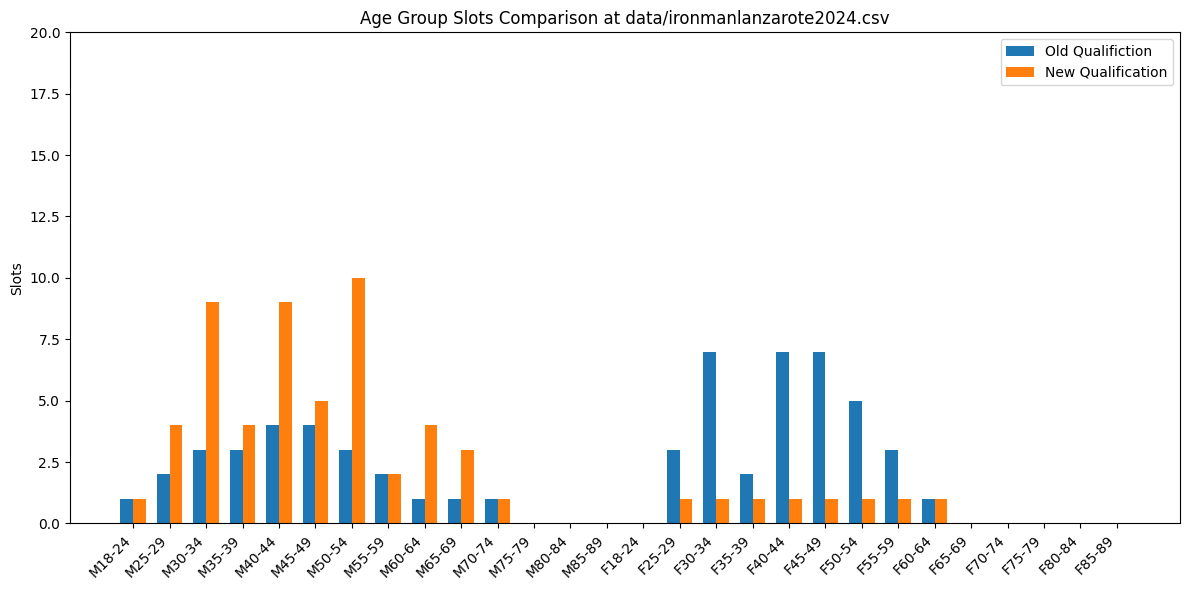

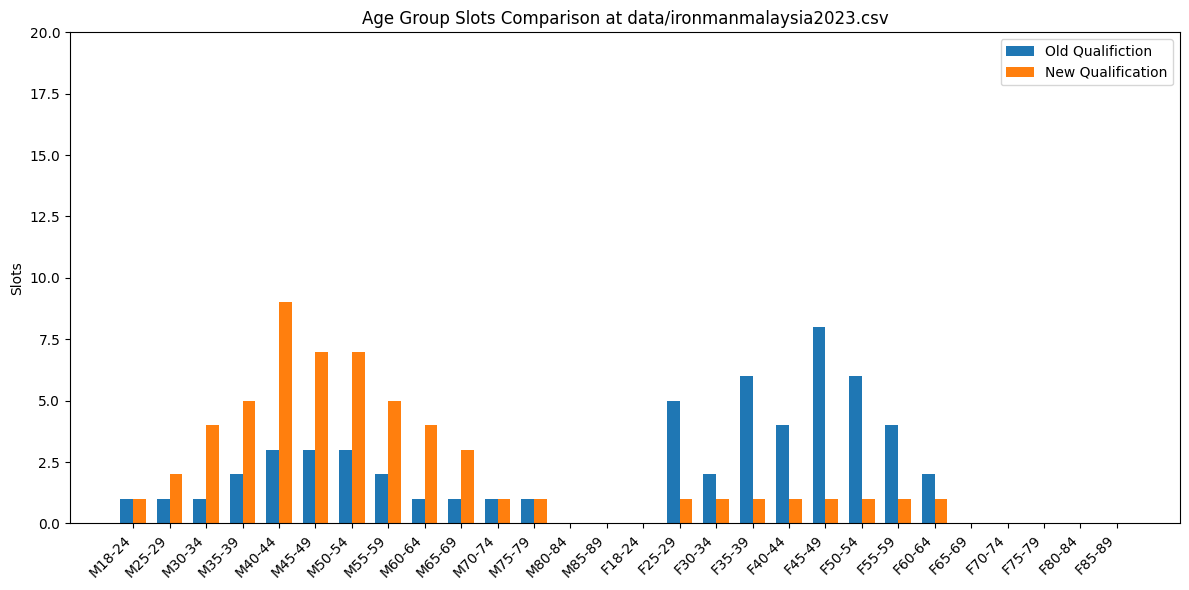

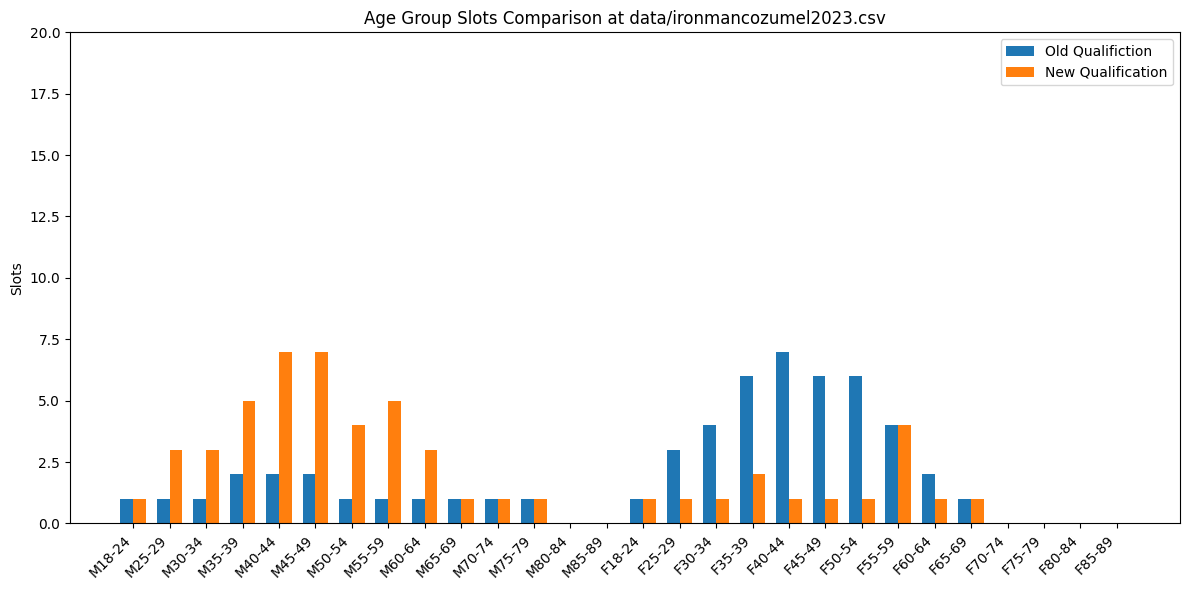

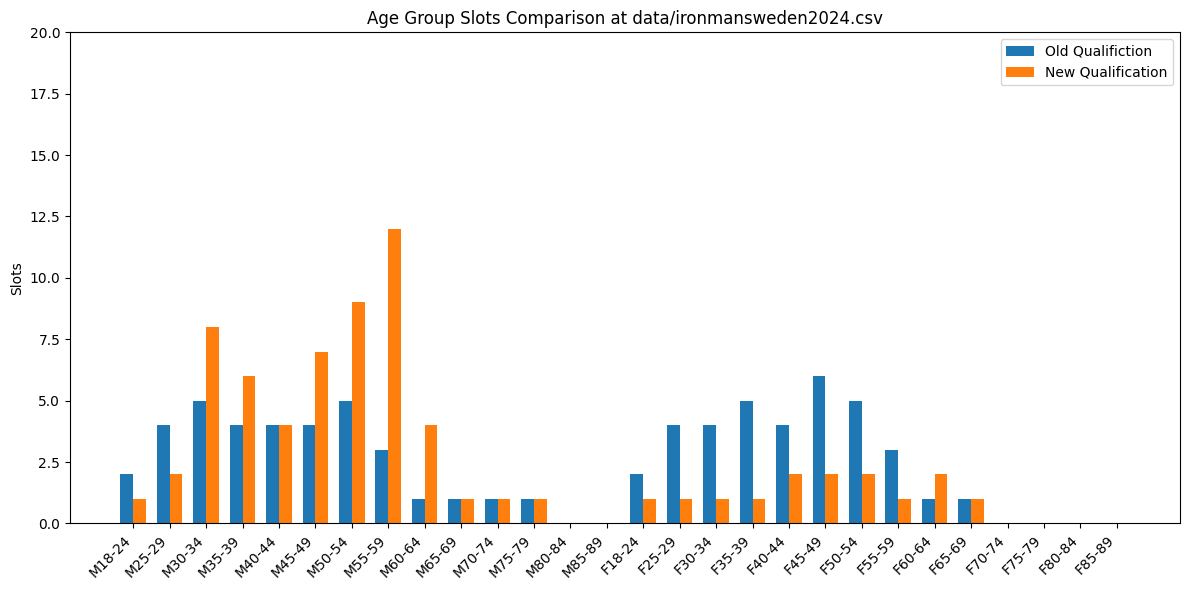

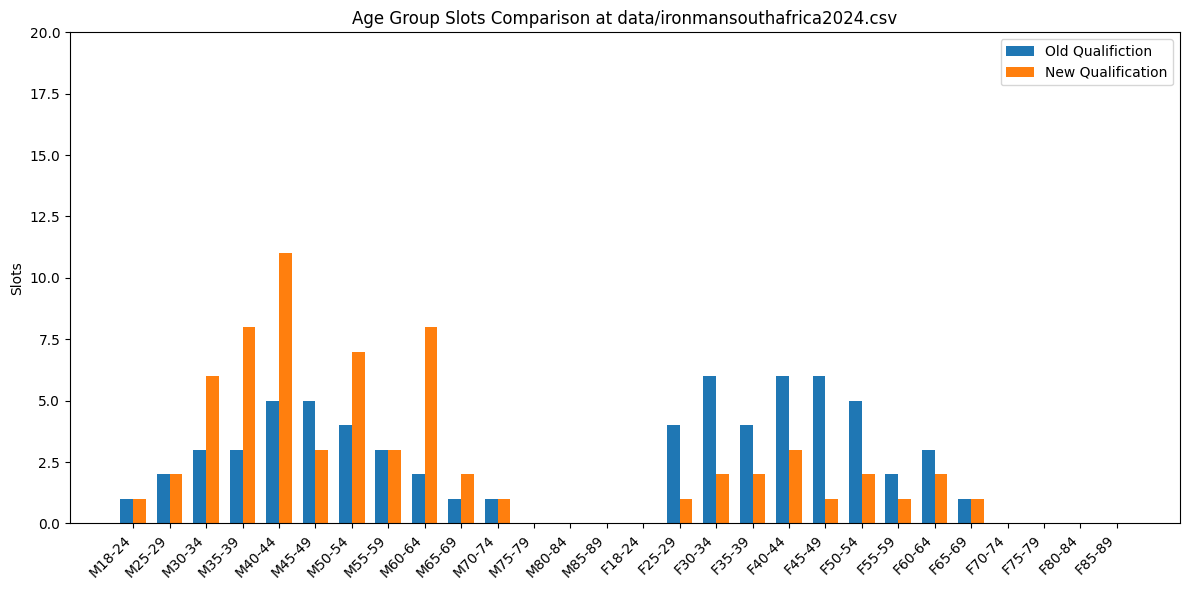

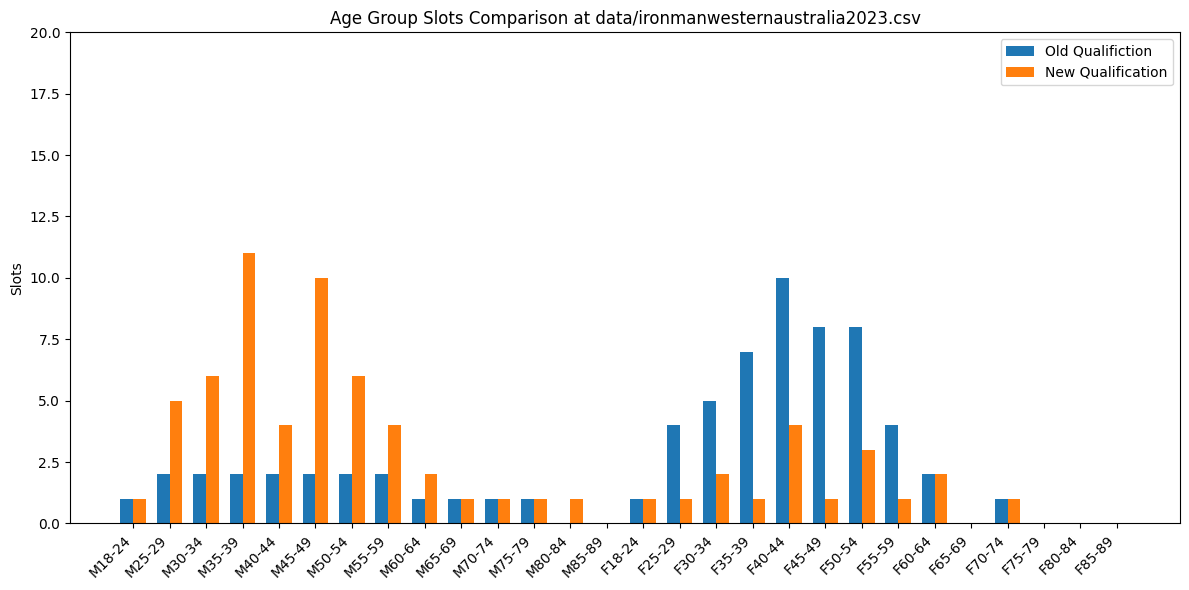

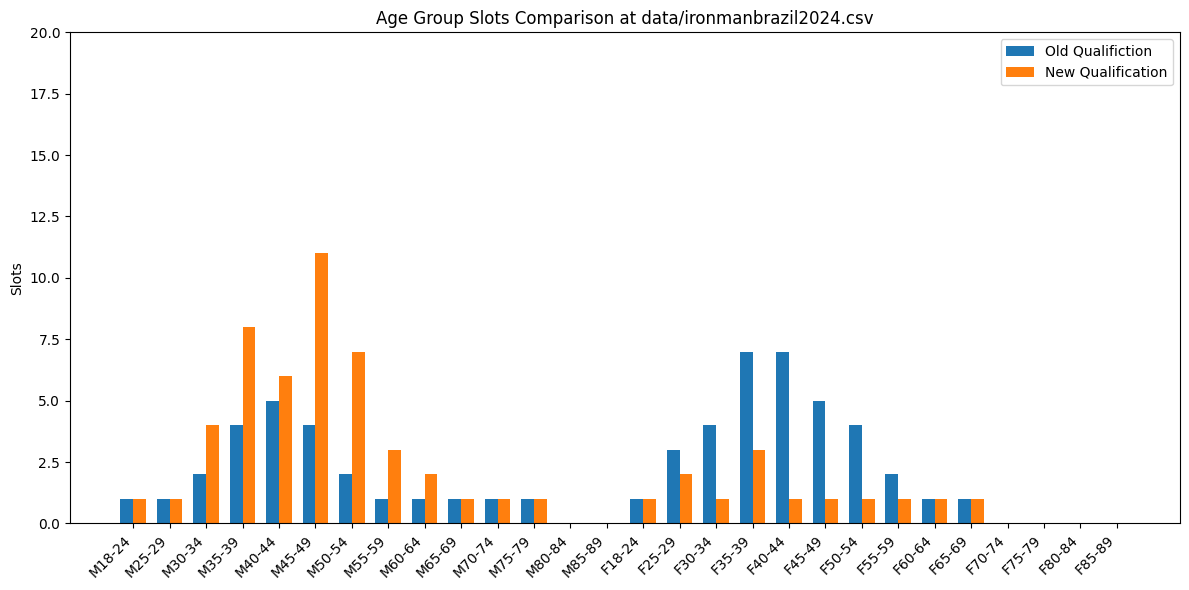

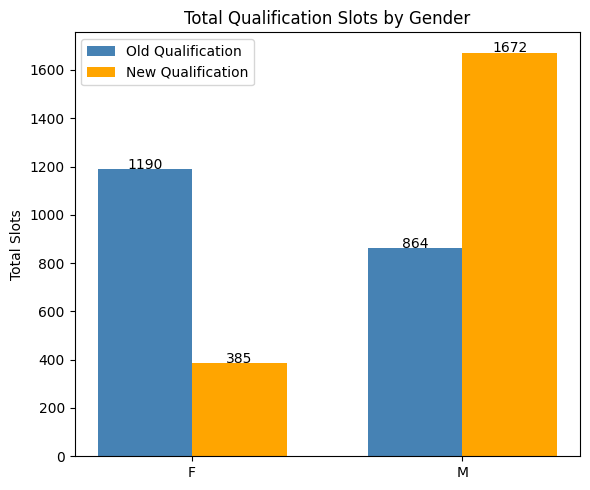

In [125]:
import glob
file_paths = glob.glob("data/*.csv")
frames = []
count = 0


data = {
    'Age Group': [
        'M18-24', 'M25-29', 'M30-34', 'M35-39', 'M40-44', 'M45-49',
        'M50-54', 'M55-59', 'M60-64', 'M65-69', 'M70-74', 'M75-79',
        'M80-84', 'M85-89',
        'F18-24', 'F25-29', 'F30-34', 'F35-39', 'F40-44', 'F45-49',
        'F50-54', 'F55-59', 'F60-64', 'F65-69', 'F70-74', 'F75-79',
        'F80-84', 'F85-89'
    ],
    'Multiplier': [
        0.9698, 0.9921, 1.0, 0.9895, 0.9683, 0.9401,
        0.9002, 0.8667, 0.8262, 0.7552, 0.6876, 0.6768,
        0.5555, 0.5416,
        0.8567, 0.8961, 0.8977, 0.8866, 0.8707, 0.8501,
        0.8125, 0.7778, 0.7218, 0.6828, 0.6439, 0.5521,
        None, None  
    ]
    }
df_Multiplier = pd.DataFrame(data)


total_old_agegroup = pd.DataFrame({'Total': pd.Series(0, df_Multiplier['Age Group'])})
total_new_agegroup = pd.DataFrame({'Total': pd.Series(0, df_Multiplier['Age Group'])})



for path in file_paths:
    df_race = pd.read_csv(path)
    df_race.drop(['Bib', 
    'Country',
    'Gender Rank',
    'Swim Time',
    'Swim Rank',
    'Gender Swim Rank',
    'Age Group Swim Rank',
    'Bike Time',
    'Bike Rank',
    'Gender Bike Rank',
    'Age Group Bike Rank',
    'Run Time', 
    'Gender Run Rank',
    'Age Group Run Rank',
    'Run Rank',
    'Transition 1 Time',
    'Transition 1 Rank',
    'Gender Transition 1 Rank',
    'Age Group Transition 1 Rank',
    'Transition 2 Time',
    'Transition 2 Rank',
    'Gender Transition 2 Rank',
    'Age Group Transition 2 Rank',
    'Qualifier Time'], axis=1, inplace=True )

    qualified_count = df_race['Qualified'].eq(1).sum()
    df_OldKQ = df_race[df_race['Qualified'] == 1].groupby('Division')
    old_KQ_agegroup = df_race[df_race['Qualified'] == 1].groupby('Division').size()

    

    df_race = df_race.merge(df_Multiplier, left_on='Division', right_on='Age Group', how='left')
    df_race['Time_seconds'] = pd.to_timedelta(df_race['Overall Time']).dt.total_seconds()
    df_race['GradedTimeseconds'] = df_race['Time_seconds'] * df_race['Multiplier']

    df_race = df_race[~df_race['Division'].isin(['MPRO', 'FPRO'])]
    newKQ = df_race[df_race['Age Group Rank'] == 1].copy()
    winnercount = newKQ['Qualified'].eq(1).sum()

    to_remove = ['DNF', 'DQ', 'DNS']
    df_race = df_race[~df_race['Finish'].isin(to_remove)]
    df_race = df_race[df_race['Age Group Rank'] != 1]
    df_race = df_race.sort_values(by='GradedTimeseconds')
 

    new_Q_count = qualified_count - winnercount
    newKQ = pd.concat([newKQ, df_race.head(new_Q_count)], ignore_index=True)
    new_KQ_agegroup = newKQ.groupby('Division').size()

    
    old_KQ_agegroup = old_KQ_agegroup.reindex(df_Multiplier['Age Group'], fill_value=0)
    new_KQ_agegroup = new_KQ_agegroup.reindex(df_Multiplier['Age Group'], fill_value=0)
    old_KQ_df = pd.DataFrame({'Total': old_KQ_agegroup})
    new_KQ_df = pd.DataFrame({'Total': new_KQ_agegroup})

    total_old_agegroup = total_old_agegroup.add(old_KQ_df, fill_value=0)
    total_new_agegroup = total_new_agegroup.add(new_KQ_df, fill_value=0)

    # Combine both series into one DataFrame, aligning on index (Divisions)
    df_compare = pd.DataFrame({
        'Dataset 1': old_KQ_agegroup,
        'Dataset 2': new_KQ_agegroup
    })

   
    labels = df_compare.index
    x = np.arange(len(labels)) 
    width = 0.35  

    fig, ax = plt.subplots(figsize=(12, 6))
    bars1 = ax.bar(x - width/2, df_compare['Dataset 1'], width, label='Old Qualifiction')
    bars2 = ax.bar(x + width/2, df_compare['Dataset 2'], width, label='New Qualification')

    ax.set_ylabel('Slots')
    ax.set_title('Age Group Slots Comparison at ' + path)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=45, ha='right')
    ax.set_ylim([0, 20])

    ax.legend()

    plt.tight_layout()
    plt.show()

total_old_gender = total_old_agegroup['Total'].groupby(lambda x: x[0]).sum()
total_new_gender = total_new_agegroup['Total'].groupby(lambda x: x[0]).sum()

# Combine into a comparison DataFrame
df_gender_compare = pd.DataFrame({
    'Old Qualification': total_old_gender,
    'New Qualification': total_new_gender
})

# Plot
labels = df_gender_compare.index
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(6, 5))
ax.bar(x - width/2, df_gender_compare['Old Qualification'], width, label='Old Qualification', color='steelblue')
ax.bar(x + width/2, df_gender_compare['New Qualification'], width, label='New Qualification', color='orange')

ax.set_ylabel('Total Slots')
ax.set_title('Total Qualification Slots by Gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)

# Optional: annotate bar values
for i in x:
    ax.text(i - width/2, df_gender_compare.iloc[i, 0] + 0.5, str(df_gender_compare.iloc[i, 0]), ha='center')
    ax.text(i + width/2, df_gender_compare.iloc[i, 1] + 0.5, str(df_gender_compare.iloc[i, 1]), ha='center')

ax.legend()
plt.tight_layout()
plt.show()
